# Methods Module 2

Welcome to the second (totally optional) methods module for People Analytics! First, some information about methods modules in general (feel free to skim this if you did the first methods module).

## General Procedure

Google Colab Notebooks are made up of text cells (like this one) and code cells (the cell below this one). Text cells are meant to provide a narrative of what we're currently doing in the notebook, and you should read what they have to say. Code cells, on the other hand, are what make Colab Notebooks so cool (or, well, you know, cool to nerds anyways).

Code cells contain [Python](https://en.wikipedia.org/wiki/Python_(programming_language)) code, which can be run on Google's servers for free if you have a Google account (which, by the way, you have through Stanford). If you hover over the code cell below, a "play" button will appear. If you click on that, the code will run and results will show up just below it. Welcome to Google Colab!

In [ ]:
print("Hello world.")

Hello world.


In [ ]:
((3 * 11) + 1)/2

17.0

Now, this module is broken up into two major parts. The first is the "guided" section, which goes from the "Importing Libraries" section through the "Inductive: Differential Language Analysis" section (click the "Table of contents" button on the sidebar of this notebook to see the outline of the module and jump to specific sections). The second part is the "Your Turn!" section, which is near the end of the module.

During the guided section, I'll provide a whole bunch of code and narrative explaining what the code is doing. This will be the main way you will learn during this module: following along with what I'm doing, seeing how it is done in Python, and looking at the results produced by the analyses I do. In this section, there will also be a few questions, typically just asking you to interpret a data visualization I just made, do a basic calculation using a formula provided, or recall someting from lecture. Be sure to answer these if you want credit. To double-check that you've answered all the questions in the guided section, you can hit Ctrl+F and search for "QUESTION (!!)".

During the "Your Turn!" section, I'll pose a series of more open-ended problems for you to complete. These will require you to do some coding. However, I've specifically designed the problems and the code in the guided section such that 90% of the coding work will be copy-and-pasting code from the guided section. Parts of the problems will also ask you to interpret your own results.

**IMPORTANT**: If you see cells that say "X cells hidden", BE SURE TO CLICK ON THOSE. This is a way for Google Colab to make notebooks more condensed, but if you don't open these up you might miss something important, such as code that will be helpful for the "Your turn!" section or questions you need to answer to receive credit!

## Goals

The goals of this methods module are as follows:
1.   Give you **hands-on experience** with automated text analysis and network analysis implemented in Python, an open-source programming language used by actual practicioners in the field of People Analytics.
2.   Give you the opportunity to **learn more** about the technical details of the analyses we'll discuss in class.

And of course, turning this module in with all questions in the guided section answered and all problems in the "Your Turn!" section completed, you'll get 30% credit towards your final paper (see the "Grading" section of the syllabus for more details). Importantly, this exercise is graded on completion. In other words, **make sure you don't miss any questions or parts of any of the problems, as this will result in you not getting any credit for the entire module**.


## Big Disclaimers

1.  As with ML algorithms, there are many different varieties of text and network analyses one can use, and we're covering only a small and non-representative sample of them here.
2.   Often times, 90% of a network or text analysis project is getting a hold of and cleaning the data (I know a PhD student that has been working for two years working to get ahold of the exact right data on which to perform text analysis). We're not doing any of that here.
3.  An important part of interpreting text analyses is going back and reading the text (automated text analysis isn't a replacement for deep reading but a way to enhance it). Since the primary goal of this module is to help you get a handle on the methods, however, we'll refrain from looking too much at the raw data.
4.   The code provided here is meant to emphasize readability over efficiency and elegance. In other words, there are "better" ways to write this code (e.g., such that it runs faster and is more concise/less repetitive).


## Turning in

Details for how to turn in methods modules are at the bottom, but you should be turning in both a .pdf file and a .ipynb file to Canvas. Look over the section at the end and follow the instructions carefully to be sure you receive credit for your work.

Now that we've talked about methods modules in general, let's talk about this specific methods module, which is on **network analysis and automated text analysis**. Network analysis is a broadly applicable way of analyzing *relational data*, while text analysis is a set of methods designed to analyze *natrual language*. With respect to network analysis, in this module you're going to learn about two ways of *clustering* network data (Spectral and Louvain), two different kinds of *centrality* measures (PageRank and betweenness), two network characteristics (the assortativity coefficient and the average clustering coefficient), and how to test the significance of network characteristics via the *configuration model*. With respect to text data, you'll learn about *closed-vocabulary* and *open-vocabulary* term frequency analysis (also called "dictionary analysis" and "differential language analysis", respectively).

# Importing Libraries

**NOTE**: This repeated from the first notebook, so feel free to skip this if you did the first methods module.

Python (the programming language our code will be in) is a really powerful tool because it is extremely flexible; you can do just about anything with it. Part of its flexibility comes from using really simple building blocks, including very general data structures (e.g. "strings" or text, "lists" or ordered collections of other objects, and "dictionaries" or collections of key-value pairings) and logical operations (e.g. "and" ["A and B" is true iff "A" is true while "B" is also true] and "or" ["A or B" is false iff "A" is false while "B" is also false]. The tradeoff of this flexibility is that it can be very painful to build complicated algorithms "from scatch".

Luckily, other folks have already done this work, and entire communities of people double-check their work and maintain Python **libraries** that are freely available and open-source. In other words, instead of needing to write all the code for building a neural network ourselves, we can download shortcuts other people have made which will allow us to use their implementation of a neural network with just a couple lines of code!

The use of libraries is indispensable for anyone in data science or machine learning, but using them comes with some serious costs. First, you need to make sure you are using reliable libraries, since **anyone** could write a library and make it available. Before using a library in high-stakes settings (e.g., scientific publication or making important business decisions), you would ideally look into the source code for a library and make sure you generally understand/agree with their implementation. That's not feasible for most, so you should definitely make sure you at least test the implementation on simple examples you can manually check and try to confirm that the libraries you are using are reputable. 

A second tradeoff with using libraries is that learning to effectively leverage the code in a library can be like learning an entire other programming language unto itself. Libraries often go through updates, meaning that what worked two weeks ago might not work any more. This can be a big cost, but it is worth noting that those who maintain libraries generally try to reduce these costs by (a) having a logic to how to use their libary, such that once you understand that logic learning new commands should be fairly striaght-forward and (b) keeping the underlying logic and the specific commands as stable as possible.

Alright, so given that introduction, let's download some libraries for us to use!

In [ ]:
# Good for basic numerical operations and random number generation
import numpy as np
import math

# Good for working with datasets
import pandas as pd
pd.options.mode.chained_assignment = None

# Good for data visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Good for network analysis
import networkx as nx
import networkx.algorithms.community as nx_comm

# Efficiently loops over combinatorials of lists
import itertools

# Will help us scrape data from the web
import requests
import json

# Will help us with analyzing text data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from collections import Counter
import re
import string

# Useful statistical tests
import scipy.stats

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# The Data

Unlike in the first module, here we'll be using real-world data (that I hope you will all find at least somewhat interesting). Specifically, we'll be using Twitter data scraped from the accounts of members of the U.S. Congress. You could definitely do this yourself via the [Twitter API](https://developer.twitter.com/en/docs/twitter-api), but we're going to instead download it from a [GitHub](https://en.wikipedia.org/wiki/GitHub) page called [Tweets of Congress](https://github.com/alexlitel/congresstweets). This is a publicly available dataset of the tweets from all members of the U.S. Congress, including all members' accounts as well as accounts associated with offices, caucauses, and other entities. The two cells directly below this "scrape" the necessary data from this GitHub page (the first gets "metadata" for the different accounts, the second pulls the actual tweets). We're going to scrape tweets from the first six months of 2021 (January 1st to June 30th).

Since we're just going to be using this one dataset throughout and you won't need to do anything like this during the "Your Turn!" section of this notebook, I won't explain what's going on in the code too much. Suffice it to say that when you scrape data from a website, your code will likely need to be highly customized to the format of that website. That is, the code I produce here isn't likely to be super helpful when downloading a different dataset from a different website, or even from a different GitHub page.

In [ ]:
# The baseline URL for the 
url = "https://raw.githubusercontent.com/alexlitel/congresstweets-automator/master/data/historical-users-filtered.json"

# Download the JSON file; url is defined in the above code block
meta_dict = json.loads(requests.get(url).text)

# Create a receptacle for the accounts' information
meta_data = []

for entity in meta_dict:

  # Pick out only the MoCs
  if entity['type'] == 'member':

    # Take the info we're interested in for each account and add it to our receptacle
    for account in entity['accounts']:
      meta_data.append({'name': entity['name'],
                        'chamber': entity['chamber'],
                        'party': entity['party'],
                        'screen_name': account['screen_name'],
                        'account_type': account['account_type']})
      
# Turn that information into an easy-to-use pandas dataframe
meta_df = pd.DataFrame(meta_data)
meta_df

name chamber party      screen_name account_type
0             Don Young   house     R      repdonyoung       office
1             Don Young   house     R       DonYoungAK     campaign
2         Bradley Byrne   house     R     BradleyByrne     campaign
3         Bradley Byrne   house     R         RepByrne       office
4           Felix Moore   house     R       BarryMoore     campaign
...                 ...     ...   ...              ...          ...
1482  Cynthia M. Lummis  senate     R   CynthiaMLummis     campaign
1483      John Barrasso  senate     R  SenJohnBarrasso       office
1484      John Barrasso  senate     R   barrassoforwyo     campaign
1485          Mike Enzi  senate     R      SenatorEnzi       office
1486          Mike Enzi  senate     R       EnziforWyo     campaign

[1487 rows x 5 columns]

In [ ]:
#The URLs for all the files begin with this path
base_url = "https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/"

#The first and last dates we want tweets for
start_date = "1/1/2021"
end_date = "6/30/2021"

#Add each date to the base URL and make a list of all the resulting file URLs
file_names = []
for d in pd.date_range(start=start_date,end=end_date):
  yr = str(d.year)
  mo = str(d.month).zfill(2) #zfill(2) just makes sure that e.g. "1" gets changed into "01"
  day = str(d.day).zfill(2)
  end = '-'.join([yr,mo,day]) #'-'.join changes e.g. ['2021','06','22'] to "2021-06-22"
  file_names.append(base_url + end + '.json')

#Download all of these files and glue them together into one big dataframe
raw_tweet_df = pd.concat([pd.read_json(f) for f in file_names])
raw_tweet_df

id      screen_name              user_id  \
0     1345148055801139200     SenMarkKelly  1324926274888888320   
1     1345108185452048384     SenMarkKelly  1324926274888888320   
2     1344901174219063296     SenMarkKelly  1324926274888888320   
3     1345075397080309760   RepKweisiMfume  1276209702322438144   
4     1345143893948563456  SenatorLoeffler  1200451909406121984   
...                   ...              ...                  ...   
3884  1410434392577748992     RepCloakroom           1137600571   
3885  1410434337527545856     RepCloakroom           1137600571   
3886  1410429633443504128     MelanieforNM   961359779003121664   
3887  1410366717738459136    Rep_Stansbury  1404519992582942720   
3888  1410352144247508992    Rep_Stansbury  1404519992582942720   

                           time  \
0     2021-01-01T18:21:02-05:00   
1     2021-01-01T15:42:36-05:00   
2     2021-01-01T02:00:01-05:00   
3     2021-01-01T13:32:19-05:00   
4     2021-01-01T18:04:30-05:00   
...                         ...   
3884  2021-06-30T23:05:38-04:00   
3885  2021-06-30T23:05:25-04:00   
3886  2021-06-30T22:46:43-04:00   
3887  2021-06-30T18:36:43-04:00   
3888  2021-06-30T17:38:48-04:00   

                                                   link  \
0     https://www.twitter.com/SenMarkKelly/statuses/...   
1     https://www.twitter.com/SenMarkKelly/statuses/...   
2     https://www.twitter.com/SenMarkKelly/statuses/...   
3     https://www.twitter.com/RepKweisiMfume/statuse...   
4     https://www.twitter.com/SenatorLoeffler/status...   
...                                                 ...   
3884  https://www.twitter.com/RepCloakroom/statuses/...   
3885  https://www.twitter.com/RepCloakroom/statuses/...   
3886  https://www.twitter.com/MelanieforNM/statuses/...   
3887  https://www.twitter.com/Rep_Stansbury/statuses...   
3888  https://www.twitter.com/Rep_Stansbury/statuses...   

                                                   text                source  
0     ICYMI: Valley Metro is going to receive $49.4 ...       Twitter Web App  
1     #OTD 7 years ago, protections for people with ...       Twitter Web App  
2     This year may not have been what we were expec...    Twitter for iPhone  
3     2020 brought our communities historic highs an...           Zoho Social  
4     While 2020 was an unprecedented year in many w...  Twitter Media Studio  
...                                                 ...                   ...  
3884                     Amendment debate has concluded       Twitter Web App  
3885  A recorded vote was requested on the Rep. Lee ...       Twitter Web App  
3886  😍 https://twitter.com/koat7news/status/1410378...    Twitter for iPhone  
3887  The #INVESTAct, on the House floor tonight, wi...    Twitter for iPhone  
3888  The Jan 6 assault on our Capitol was one of th...    Twitter for iPhone  

[416622 rows x 7 columns]

# Analyzing Temporal Variation in MoCs Tweet

As a first descriptive analysis, let's see *when* members of the U.S. congress (MoCs) tend to tweet. To do this, we'll create a version of the dataset we just scraped with the time stamp transformed into something easier to aggregate on. In the cell blow, I create `time_df`, which is exactly this.



In [ ]:
#Define a new dataframe for this analysis so we don't mess up our other one
time_df = raw_tweet_df[['time']]

#Split up the time column to make it a little easier to use
time_df['date'] = time_df.time.apply(lambda x: x.split('T')[0])
time_df['time'] = time_df.time.apply(lambda x: x.split('T')[1][:-6])

def timestamp_to_minute(t):
  '''
  Function that takes in a HH:mm:ss time stamp and converts to a single
  number corresponding to what minute of the day this time is equivalent to
  '''
  hr, min, sec = t.split(':')
  return (60*int(hr)) + int(min)

#Get the minute of the day each tweet was published
time_df['min'] = time_df.time.apply(timestamp_to_minute)

#Get the day of the year each tweet was published
time_df['day'] = time_df.date.apply(lambda x: x[5:])

time_df

time        date   min    day
0     18:21:02  2021-01-01  1101  01-01
1     15:42:36  2021-01-01   942  01-01
2     02:00:01  2021-01-01   120  01-01
3     13:32:19  2021-01-01   812  01-01
4     18:04:30  2021-01-01  1084  01-01
...        ...         ...   ...    ...
3884  23:05:38  2021-06-30  1385  06-30
3885  23:05:25  2021-06-30  1385  06-30
3886  22:46:43  2021-06-30  1366  06-30
3887  18:36:43  2021-06-30  1116  06-30
3888  17:38:48  2021-06-30  1058  06-30

[416622 rows x 4 columns]

Now, with this more easily manipulatable dataframe, we'll ask two questions and create graphs that corresponds to each. The first, which I answer below, is "at what time of day do MoCs tend to tweet?". To answer this, I simply count how many tweets occur during each minute of the day and graph it.

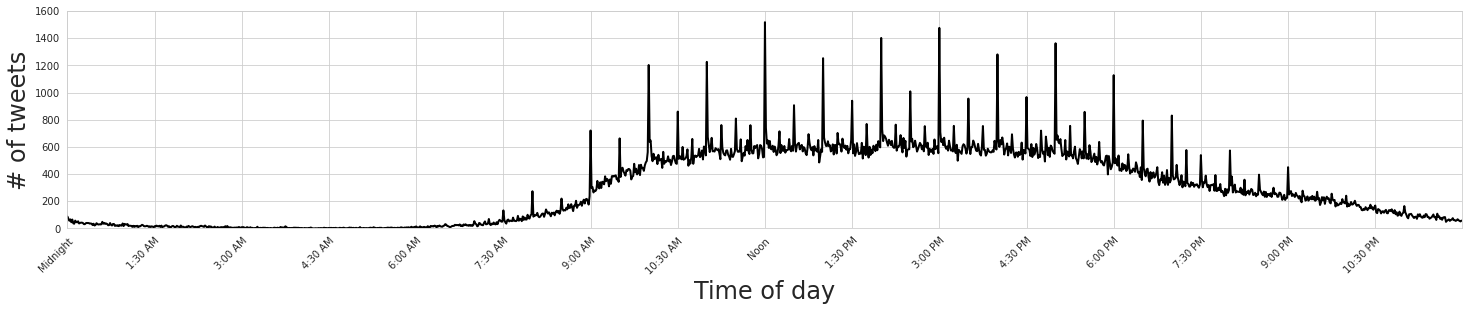

In [ ]:
sb.set_style("whitegrid")
#Create a figure with an appropriate size to view the data 
#(arrived at through trial + error)
plt.figure(figsize=(25,4))

#Plot the number of tweets by time
plt.plot(time_df.groupby('min').size(), color="black", lw=2)

#Make the tick marks along the x-axis more legible
plt.xticks([i*90 for i in range(16)],
           ["Midnight", "1:30 AM", "3:00 AM", "4:30 AM", "6:00 AM", "7:30 AM", 
            "9:00 AM", "10:30 AM", "Noon", "1:30 PM", "3:00 PM", "4:30 PM", 
            "6:00 PM", "7:30 PM", "9:00 PM", "10:30 PM"],
           rotation=45, rotation_mode='anchor',ha='right',va='top')

#Add a label to our x- and y-axes, respectively
plt.xlabel("Time of day", fontsize=24)
plt.ylabel("# of tweets", fontsize=24)
plt.ylim(0,1600)
plt.xlim(0,1440)

plt.show()

**QUESTION (!!)**: What might explain the regular "spikes" at each hour and the "smaller spikes" at 10 minute intervals?

Double-click to provide your answer.

Next, we'll answer "on what days did MoCs tweet more and less?". To do that, we'll do exactly as we did before, but aggregate tweets on the basis of `day` instead of `minute`.

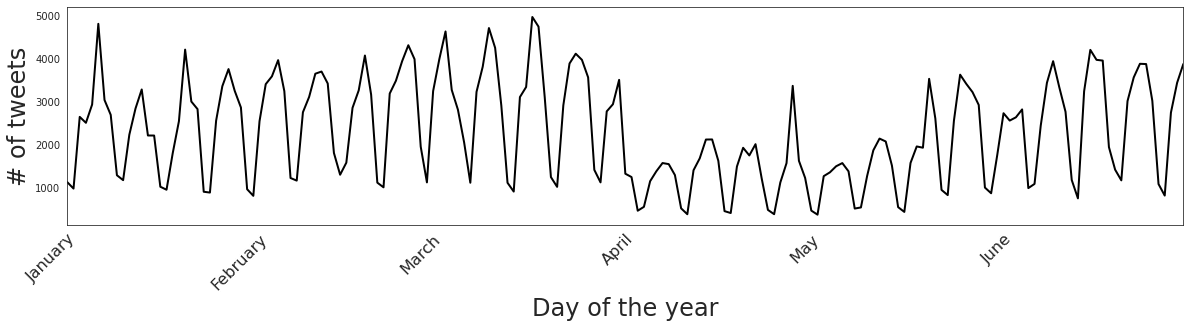

In [ ]:
sb.set_style("white")
#Create a figure with an appropriate size to view the data
plt.figure(figsize=(20,4))

#Plot the number of tweets by day
plt.plot(time_df.groupby('day').size(), color="black", lw=2)

#Make the tick marks along the x-axis more legible
plt.xticks(['{}-01'.format(str(i+1).zfill(2)) for i in range(6)],
           ["January","February","March","April","May", "June"],
           rotation=45, rotation_mode='anchor',ha='right',va='top',fontsize=16)

#Add a label to our x- and y-axis, respectively
plt.xlabel("Day of the year", fontsize=24)
plt.ylabel("# of tweets", fontsize=24)
plt.xlim('01-01','06-30')

plt.show()

One thing to notice is that there's a significant "dip" in Twitter acticity in April and May. There also appears to be regular intervals throughout our observation period at which MoCs tend to tweet more and less. To get a better look at this, I'll reproduce this graph but such that it is much larger and with each date labeled.

To get a better look at the graph, click on it (which should enlargen it). If you still can't see it very well, copy and paste the image from the nootbook to a program where you can zoom in (e.g., paint).

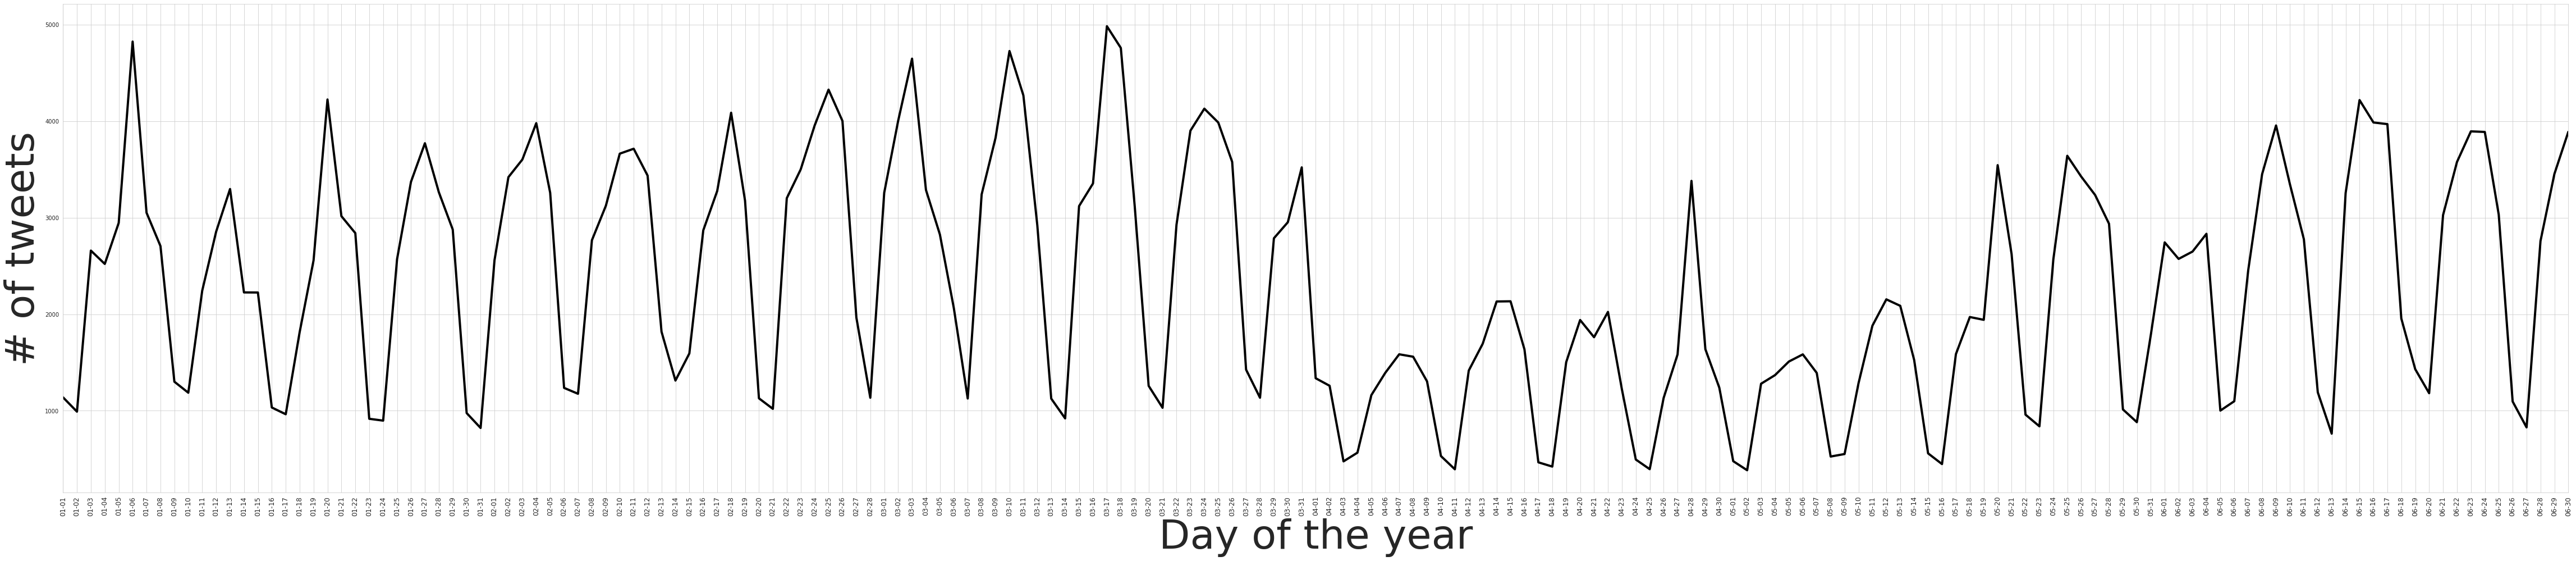

In [ ]:
sb.set_style("whitegrid")
#Create a figure with an appropriate size to view the data
plt.figure(figsize=(80,16))

#Plot the number of tweets by day
plt.plot(time_df.groupby('day').size(), color="black", lw=4)

plt.xticks(fontsize=12,rotation='vertical')

#Add a label to our x- and y-axis, respectively
plt.xlabel("Day of the year", fontsize=72)
plt.ylabel("# of tweets", fontsize=72)
plt.xlim('01-01','06-30')

plt.show()

**QUESTION (!!)**: What to do the regular lowpoints in tweets correspond to? (It might be helpful to look at a calendar)

Double-click to enter your response.

# Network Analysis

[Network analysis](https://en.wikipedia.org/wiki/Network_theory) is, at its core, the anaylsis of relational data (i.e., data where there are relationships between observations). Where in traditional statistical analysis we assume observations are identically and independently distributed ([i.i.d.](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)), in network analysis we're explicily interested in how observations are *interdependent*.

There are a lot of different kind of network analysis including statistical modeling of network processes (e.g., [ERGMs](https://en.wikipedia.org/wiki/Exponential_family_random_graph_models) and their many variants, [SAOMs](https://www.annualreviews.org/doi/abs/10.1146/annurev-statistics-060116-054035)), [link prediction](https://en.wikipedia.org/wiki/Link_prediction), and [graph learning](https://en.wikipedia.org/wiki/Graph_neural_network) (deep learning applied to networks). We're going to focus in on measuring one's position in a network (their *centrality*), identifying groups in networks (*community detection*), and measuring charateristics of the entire network.

In this module, we'll analyze MoCs "mentioning" each other in Tweets. For instance, here's a tweet from our data:

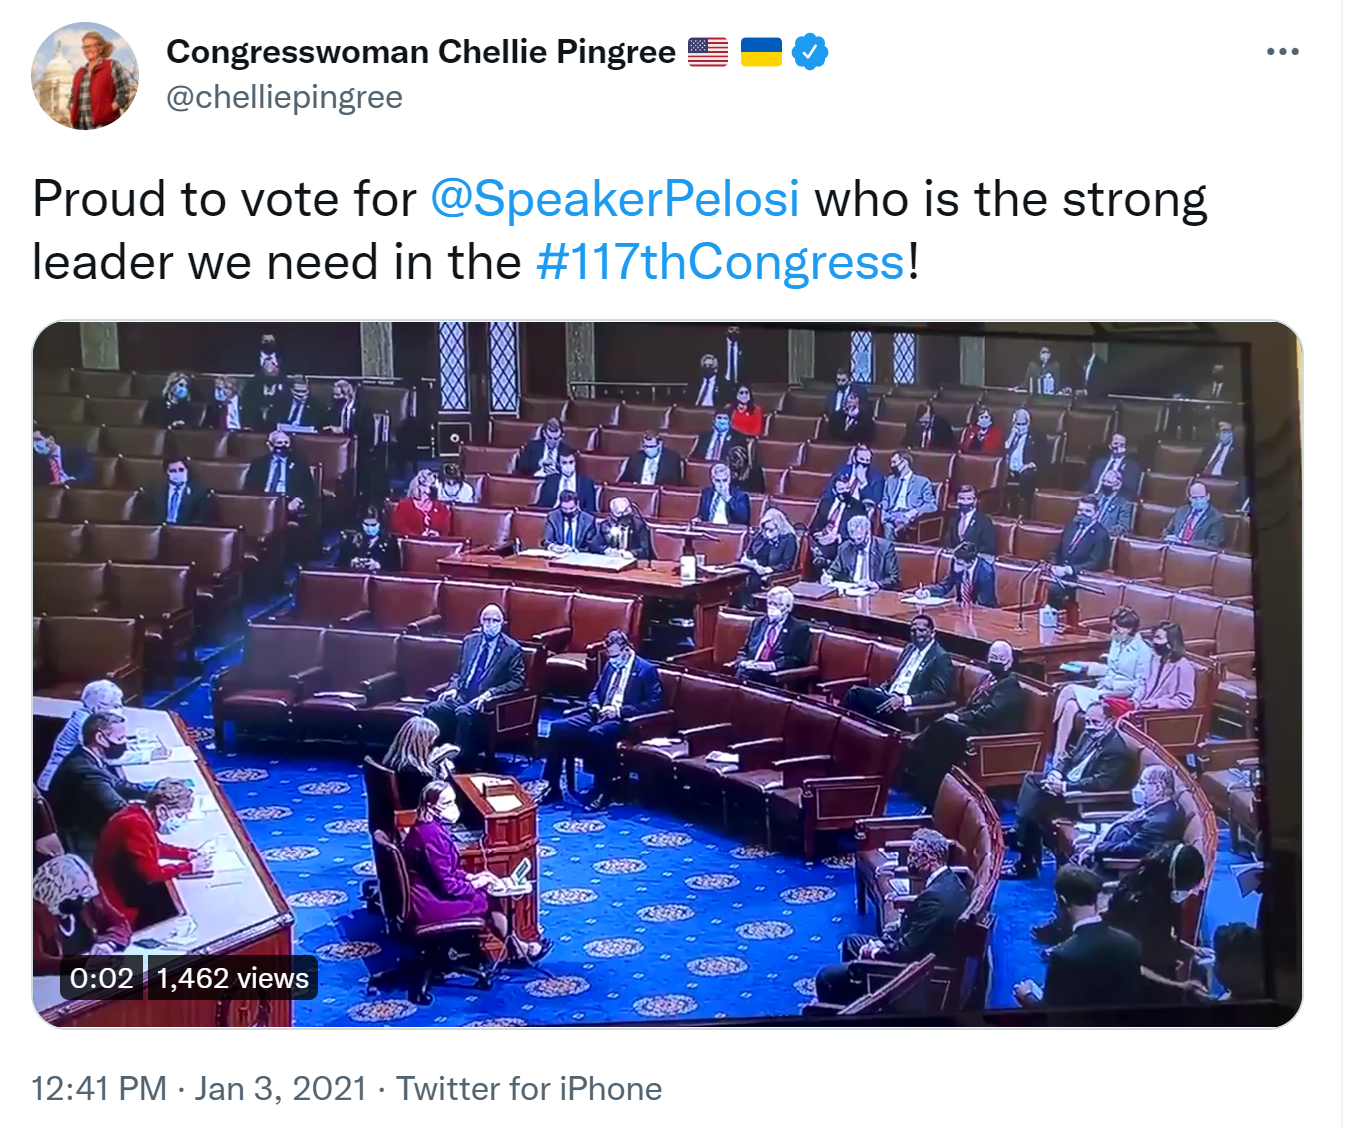

In this tweet, [Chellie Pingree](https://en.wikipedia.org/wiki/Chellie_Pingree) (D-ME) mentions [Nancy Pelosi](https://en.wikipedia.org/wiki/Nancy_Pelosi) by her Twitter handle (@SpeakerPelosi). This is the kind of "interaction" we'll be measuring and analyzing from our corpus; "mentions", as they're called in Twitter parlance. There are a couple things to note here. First, if she were to only mention her by name (and not by handle), we won't catch it (there are some ways to try and do this but it's non-trivial). Also, there are definitely other interactions we could measure (e.g., quote tweeting, retweeting), but we're only focusing on mentiones. Importantly, mentions are some times negative, but often positive (like the tweet shown above).

Now, the most "realistic" version of this data would be a directed graph with weights. That is, one person mentions another (i.e., the relationship isn't necessarily symmetric), and individuals mention others more or less often (e.g., I might mention one person once and another person a thousand times). We'll collect our data in accordance with this, but for various algorithms we'll need to simplify our data (e.g., make all relationships symmetric or make all relationships that exist be of equal weight).

In the cells below we create our network from the data we scraped. Essentially, for every tweet that is neither a retweet nor a quote tweet, we extract any mentions of another MoCs and increase how strong the relationship should be between the MoC who posted the tweet and the mentioned MoC in the network.

**More technical stuff, feel free to skim**. Some notes on how we'll formally notate our network data in this module.

Formally, the "realistic" version of the network can be represented as an *adjacency matrix* $A$, where element $A_{i,j} \in \mathbb{N}$ (i.e., is a [natrual number](https://en.wikipedia.org/wiki/Natural_number)) denotes how many times MoC $i$ mentioned MoC $j$ in our data. 

In an unweighted version of the network (let's call it $A^{-W}$, as in "$A$ without weights"), $A^{-W}_{i,j} \in \{0, 1\}$, equal to $1$ if $i$ ever mentions $j$ (i.e., $A_{i,j} > 0$)and is equal to $0$ otherwise. 

In an undirected version (let's call it $A^{-D}$, as in "$A$ without direction"), $A_{i,j}^{-D} = A_{j, i}^{-D} = (A_{i,j} + A_{j, i})$ denotes how often $i$ mentions $j$ in addition to how often $j$ mentions $i$. 

Finally, in the most simplified version (let's call it $A^{-WD}$, as in "$A$ without weights or direction"), $A_{i,j}^{-WD} = A_{j, i}^{-WD} \in \{0, 1\}$ and $A_{i,j}^{-WD} = 1$ if $(A_{i,j} + A_{j, i}) > 0$ and is equal to $0$ otherwise.


In [ ]:
# Create a receptacle for relationships between MoCs
links = {}

# Create an easy way to look up the MoC associated with a Twitter account
account_nodes = {x['screen_name']: x['name'] for i, x in meta_df.iterrows()}

# For each tweet...
for i, x in raw_tweet_df.iterrows():

  t = x['text']

  # If the tweet isn't a retweet...
  if 'RT' in t:
    continue

  # ...and it doesn't quote another tweet...
  elif 'QT' in t:
    continue

  # ...and it possibly mentions someone...
  elif '@' not in t:
    continue
  
  else:

    # Then for each mention of a MoC, increment the strength of the relationship
    # between the sender and reciever of the mention.
    t = t.split(' ')
    for w in t:
      if len(w) == 0:
        continue
      elif w[0] == "@":
        # This removes punctuation from the mention so we know that e.g., 
        # "@NacyPelosi," is really "@NancyPelosi"
        w = w.translate(str.maketrans('', '', ",.?!;@"))
        if (w in account_nodes) and (x['screen_name'] in account_nodes):
          i = account_nodes[x['screen_name']]
          j = account_nodes[w]
          if (i,j) not in links:
            links[(i,j)] = 0
          links[(i,j)] += 1

In [ ]:
# Initialize an empty (directed) network
G = nx.DiGraph()

# Add each MoC to the network (with their names)
G.add_nodes_from(meta_df.name.to_list())

# Add the party of each MoC ("D", "R", "I", or "L") to the network
party = {x['name']: x['party'] for ind, x in meta_df.iterrows()}
nx.set_node_attributes(G, party, "party")

# Add the chamber to which each MoC belongs ("senate" or "house") to the network
chamber = {x['name']: x['chamber'] for ind, x in meta_df.iterrows()}
nx.set_node_attributes(G, chamber, "chamber")

# Add the edges from the above cell to the network
G.add_edges_from((k[0], k[1], {"weight": v}) for k, v in links.items())

# Remove self-mentions and isolates (MoCs who never mention and are never 
# mentioned by anyone) from the network
G.remove_edges_from(nx.selfloop_edges(G))
G.remove_nodes_from(list(nx.isolates(G)))

To make the network look nicer and make it easier to work with, we'll also remove folks who have relatively few connections. To get a sense of how few is "few" in the context of this network, let's plot out the "degree" (sum of the weight of connections) for each MoC.

**Formal**. We're going to measure and examine the distribution of the "total degree" for each MoC $i$: 

$D^{t}_{i} = \sum^{|V|}_{j=1} A_{i,j} + A_{j,i}$

Where $V$ is our set of *vertices* (or *nodes*, or, in our case, MoCs). We'll then remove vertices with lower than a selected value of $D^{t}_{i}$ from the network.

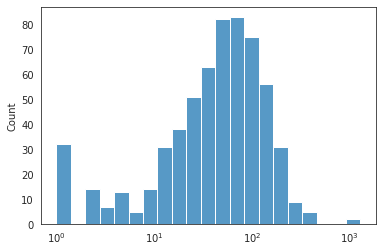

In [ ]:
sb.set_style("white")
plt.xscale('log')
sb.histplot(x=list([i[1] for i in G.degree(weight='weight')]))
plt.xscale('log')
plt.show()

In [ ]:
# Remove those MoCs with a degree of 10 or less
low_degree = [node for node,degree in dict(G.degree()).items() if degree < 10]
G.remove_nodes_from(low_degree)

Now that we have a fairly clean network, we'll plot it out. Given a fixed network (i.e., an adjacency matrix), there are still many ways to draw it (where on the graph does each node go?). Typically in network analysis we use one of a set of [layout algorithms](https://en.wikipedia.org/wiki/Graph_drawing#Layout_methods), which try to arrange the nodes of the network in a way that accurately reflects its structure. We're going to use a [force-directed algorithm](https://en.wikipedia.org/wiki/Force-directed_graph_drawing), which models the network as a physical system where nodes that are connected are pulled together and other nodes are pushed apart. Our particular method, the [Kamada-Kawai algorithm](https://www.sciencedirect.com/science/article/pii/0020019089901026?via%3Dihub), will operate on $A^{-D}$ (i.e. it will ignore directionality in our network). However, it will only be making decisions on this modified adjancency matrix and not, for instance, on the basis of MoCs' political parties.

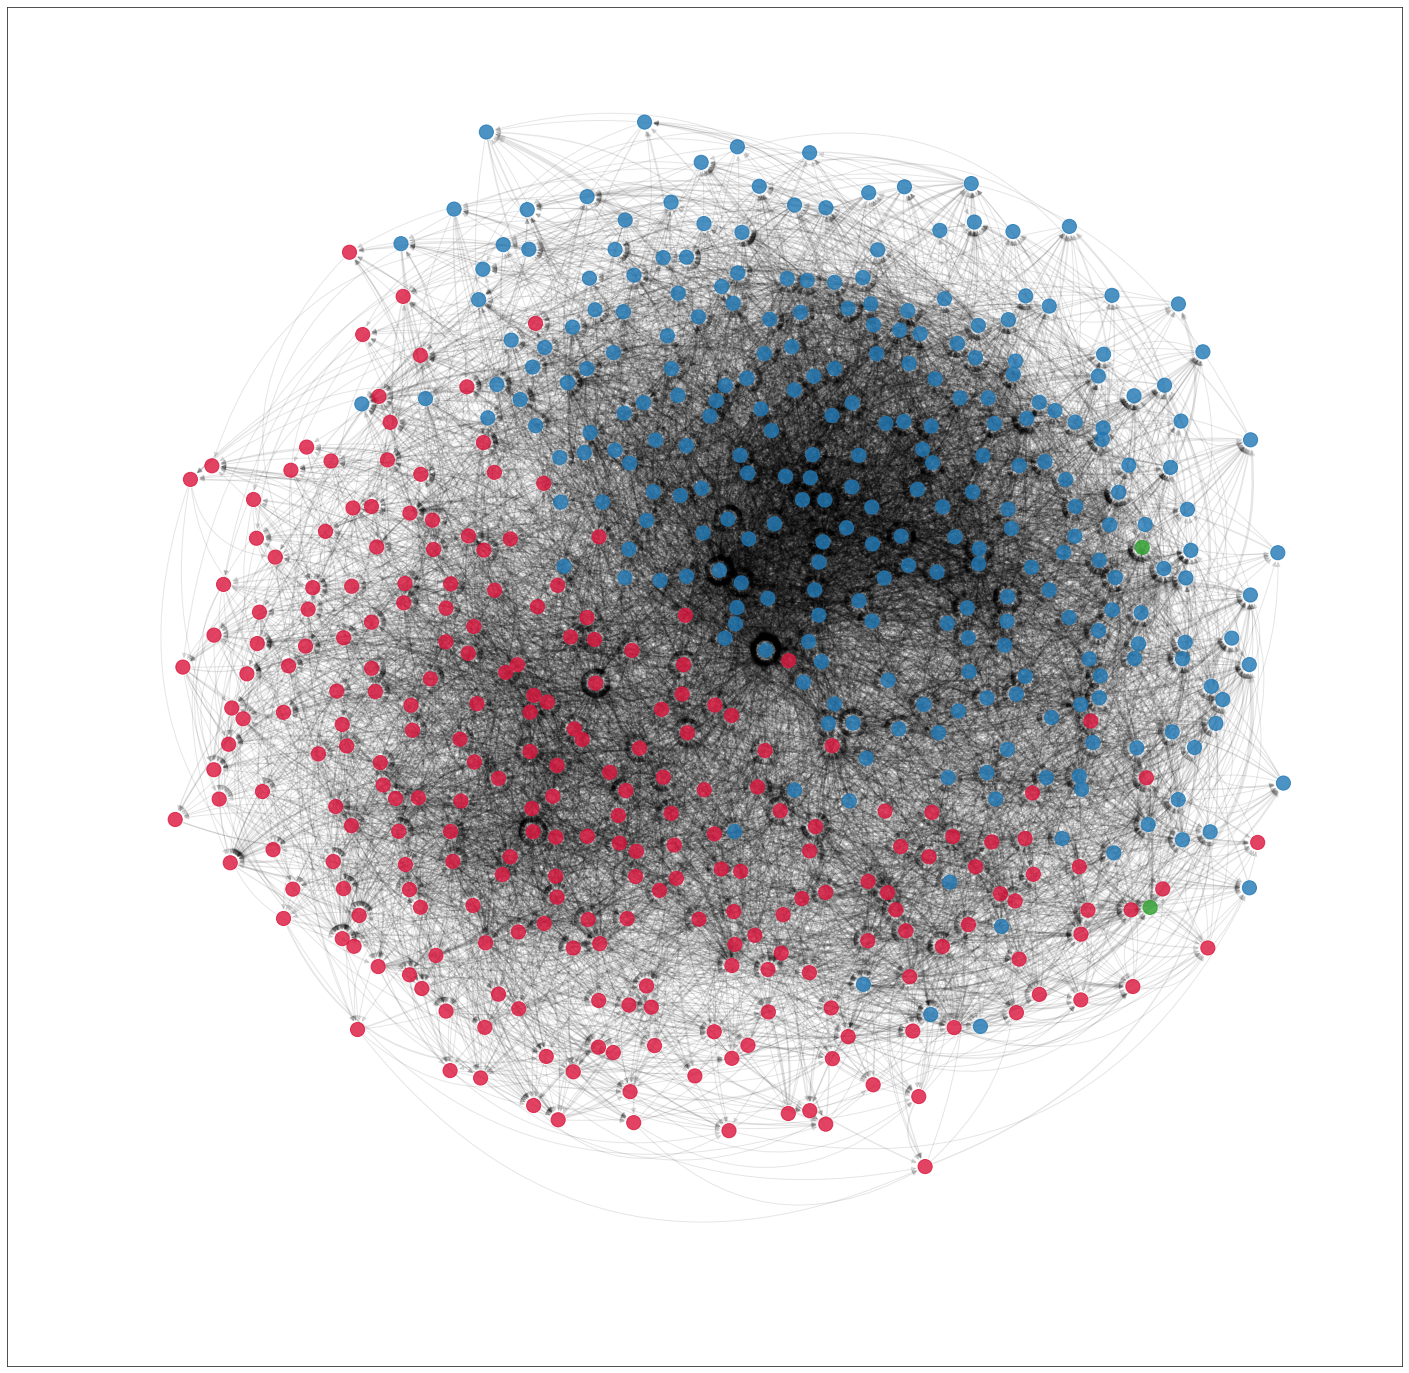

In [ ]:
sb.set_style("white")
plt.figure(figsize=(25,25))

# Map each party in the data to the color they will be in the figure
color_dict = {"R": "crimson", "D": "tab:blue", 
              "I": "tab:green", "L": "tab:orange"}

# Create an ordered list of the appropriate color for each node in the data
colors = [color_dict[n[1]['party']] for n in G.nodes(data=True)]

# Calculate the positions of each node using the Kamada-Kawai algorithm
pos = nx.kamada_kawai_layout(G, weight='weight', scale=1)

# Draw the network edges
nx.draw_networkx_edges(G, pos, alpha=0.1,
                       width=[math.sqrt(G[i][j]['weight']) for i, j in G.edges],
                       connectionstyle="arc3,rad=0.4")

# Draw the network nodes
nx.draw_networkx_nodes(G, pos, node_color=colors, alpha=0.8, node_size=200)

plt.show()

**QUESTION (!!)**: On the basis of this graph alone, does it look like Democrats mention other Democrats more than Republicans and that Republicans mention other Republicans more than Democrats? Why or why not?

## Centrality Measures

Next, we'll focus in on individuals' positions within the network. There's a great deal of research that suggests one's position in a social network is related to their future success. Specifically, we'll be looking at which MoCs are *central* to our mention network.

These measures can be computed directly from our adjacency matrix, though the math can get a bit cumbersome (as you'll see). Luckily, `networkx` has a series of functions that make calculating these super easy.

### PageRank

[PageRank](https://en.wikipedia.org/wiki/PageRank) is a measure that was invented at Google to measure how "important" web pages are on the basis of their position in a hyperlink network. Generally, if ties can be thought of as "votes" for nodes (i.e., measures of endorsing or relying upon), then PageRank is a good measure of "importance", especially in directed networks (for undirected networks, also see [eigenvector centrality](https://en.wikipedia.org/wiki/Eigenvector_centrality)).

Before talking about how to measure PageRank, it's nice to first have an intuitive illustration. Imagine a network of web pages, where directed connections between them denote that the sending site has a link on its page to the receiver site. Now imagine that we had a "surfer" who randomly starts on one page and, with probability $d$ (normally 0.85), transitions to a randomly selected site the page they're on links to. Instead, with probability $1-d$ (normally 0.15), the surfer ends their session. If the surfer moves to a new site, it continues this process until it eventually ends it (if at any point the surfer gets to a page with no outgoing links and wants to continue its session, it moves to a randomly selected webpage anywhere in the network). The PageRank measure for each web page is the probability that the surfer would end its session after having visited each site.

Now for how we calculate PageRank. Imagine we have the following network below, in which politicians link to each other if the sender endorses the receiver:

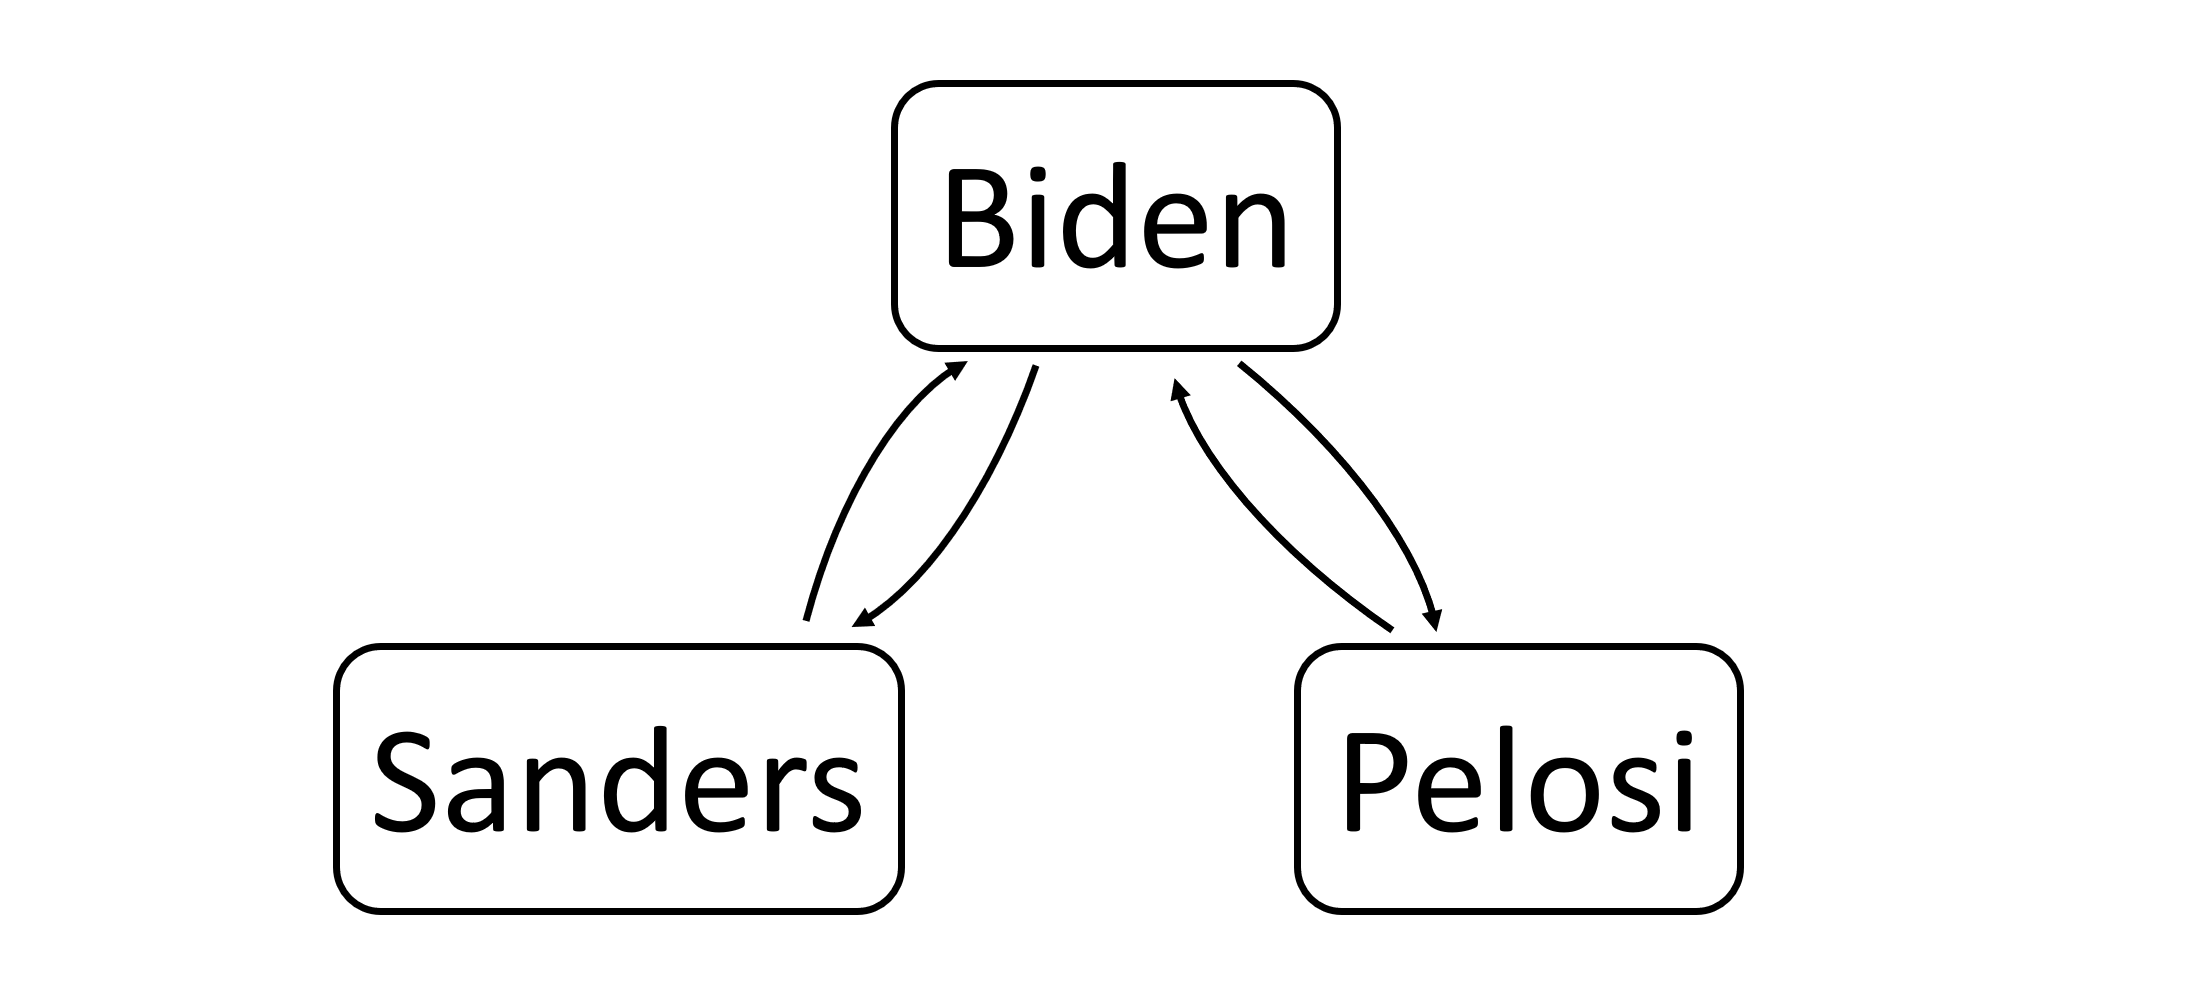

We first intitialize each politician's PageRank to be one divided by the number of nodes (in this case, each would have a PageRank of 0.33) and select a "dampening factor", which is typically set to 85%. Then, during each iteration every node "gives" d% of its PageRank away to the nodes it has outgoing links to, equally splitting it among them. This process repeats until the values converge (i.e., don't change after additional iterations), and those stationary values are the final PageRank scores. Let's do these calculations manually for two iterations with the network above and the dampening factor set to 0.85.

0. **Biden = 0.33, Pelosi = 0.33, Sanders = 0.33**: we set each node to have $\frac{1}{N}=\frac{1}{3}$ PageRank.
1. **Biden = 0.6105, Pelosi = 0.18975, Sanders = 0.18975**: Biden gives $\frac{0.85 \cdot 0.33}{2}=0.14025$ PageRank to Sanders and Pelosi each; Pelosi and Sanders each give $0.85 \cdot 0.33 = 0.2805$ PageRank to Biden.
2. **Biden = 0.41415, Pelosi = 0.287925, Sanders = 0.287925**: Biden gives $\frac{0.85 \cdot 0.6105}{2}=0.2594625$ PageRank to Sanders and Pelosi each; Pelosi and Sanders each give $0.85 \cdot 0.18975=0.1612875$ PageRank to Biden).

**QUESTION (!!)**: Calculate the next iteration, describing (as above) how much PageRank Biden, Pelosi, and Sanders "give" to each other and what their PageRank value is after the iteration. (Hint: they should sum up to 0.99)

Double-click to provide your response.

Now, if you were to do this for more than ten iterations, you would find that the values would converge and would no longer change with additional iterations. This stationary value is the final PageRank measure. In practice this is implemented via matrix multiplication which makes it pretty easy (and quick) to do for computers. Below, we calculate the PageRank for each node in our network and print out the 10 MoCs with the highest PageRank.

In [ ]:
# Calculate pagerank for each node in our network
pr = nx.pagerank(G, weight='weight').items()

# Print the 25 MoCs with the highest pgeranks
sorted(pr, key=lambda x: x[1], reverse=True)[:10]

[('Raphael G. Warnock', 0.061038648769260184),
 ('Kamala Harris', 0.05643559863216156),
 ('Nancy Pelosi', 0.027155199676717947),
 ('Jon Ossoff', 0.02199479461951421),
 ('Kevin McCarthy', 0.011285582896039372),
 ('Alexandria Ocasio-Cortez', 0.00928353802772337),
 ('Cory Booker', 0.008763714658500918),
 ('Chuck Schumer', 0.00832722083749581),
 ('Deb Haaland', 0.008273729621486548),
 ('Steve Scalise', 0.0075214306144266154)]

### Betweenness Centrality

[Betweenness centrality](https://en.wikipedia.org/wiki/Betweenness_centrality) is another general measure of importance in networks (which works especially well for weighted and directed graphs). For each pair of nodes in the network, we calculate all of the "shortest paths" (or geodesics; the path of edges that connect two nodes with the lowest sum of weights) and increase the betweenness centrality of each node in those shortest paths. So, the higher a node's betweenness centrality, the more shortest paths they are a part of. There are [some tricks](https://kops.uni-konstanz.de/bitstream/handle/123456789/5739/algorithm.pdf) to make this relatively quick to compute.

A little more formally, betweenness centality is measured as:

$b_{i} = \sum_{j,k \in V; i \neq j \neq k} \frac{\sigma_{j,k}^{i}}{\sigma_{j,k}}$ 

Where $V$ is the set of all vertices, $\sigma_{j,k}$ is the number of shortest paths between nodes $j$ and $k$, and $\sigma_{j,k}^{i}$ is the number of shortest paths between nodes $j$ and $k$ that contain (or "pass through") node $i$ (I know, the notation for this measure is so dense and not that useful).

Now, one important thing to notice about this measure is that the weight of edges here are the "cost" of traversing them. That is, more weight here means that nodes should be "less related". So, for instance, in a network of towns where edges are possible roads/interstates to take to get from one to the other, the weight might be how much time using that road to get between those two places takes on average. In our network, however, edges are how connected two MoCs are by way of Twitter mentions, meaning that higher values make the two nodes more related. 

So, in the cell below, I first calculate an "inverse weight" measure and assign that to the edges of our network, which will just literally be the inverse of their weight in $A$. Then, I use this inverse weighted $A$ when we calculate each MoC's betweenness centrality in our network. Finally, I print the 10 MoCs with the highest betweenness centralities.

In [ ]:
# Create inverse weights for ties in the network
inverse_weights = {(e[0],e[1]): 1/e[2]['weight'] for e in G.edges(data=True)}
nx.set_edge_attributes(G, inverse_weights, 'inverse_weight')

# Calculate betweenness centrality for all nodes in the network
between = nx.betweenness_centrality(G, weight='inverse_weight')

# Print the 10 MoCs with the highest betweenness centralities
sorted(between.items(), key=lambda x: x[1], reverse=True)[:10]

[('Nancy Pelosi', 0.48299468974233534),
 ('Mariannette Miller-Meeks', 0.10799532676940637),
 ('Chuck Schumer', 0.10455525318003914),
 ('Marco Rubio', 0.0786935466609589),
 ('Elizabeth Warren', 0.07614715834964123),
 ('Marjorie Greene', 0.07151100273157208),
 ('Ashley Hinson', 0.06787201743925309),
 ('Kevin McCarthy', 0.06434304672211351),
 ('Jon Ossoff', 0.05463749337491846),
 ('Raphael G. Warnock', 0.054287446999347684)]

## Community Detection

The next task we'll focus on tries to identify groups/cliques/communities within our network. This general task is called [community detection](https://en.wikipedia.org/wiki/Community_structure#Algorithms_for_finding_communities). There are a whole lot of algorithms for doing this, but we're just going to focus on two: spectral clustering and Louvain clustering. If you are really interested in community detection, I would also recommend looking into [stochastic block modeling](https://en.wikipedia.org/wiki/Stochastic_block_model) and the [Girvan-Newman](https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm) algorithm.

Unfortunately, there aren't (in my opinion) good community detection algorithms implemented in networkx for directed and weighted networks. So, for both we'll need to use on the "simplified" versions of our network described in the "The Data" section.

### Spectral Clustering

[Spectral clustering](https://en.wikipedia.org/wiki/Spectral_clustering) uses [eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of a Laplace-transformed adjacency matrix to uncover latent community structure in a network. The algorithm outputs a continuous score for each node indicating the degree to which it belongs to one group instead of another. If you group nodes into communities based on whether their scores are greater or less than zero, this algorithm will tend to group nodes such that those groupings will have low values of conductance, defined for two sets/groupings of nodes (let's call them $S_{1}$ and $S_{2}$) as:

$\phi(S_{1}, S_{2}) = \frac{\sum_{i \in S_{1}, j \in S_{2}}A_{ij}}{min(\sum_{i \in S_{1}}\sum_{j \in S_{1}}A_{ij}; \sum_{j \in S_{2}}\sum_{j \in S_{2}}A_{ij})}$

Intuitively, this is the strength of network ties that *cross* the two groups divided by strength of network ties *within* groups. I personally like spectral clustering algorithm because we have pretty solid "theoretical guarentees" (i.e., if some things are true about our network we know our algorithm will produce reasonably good groups), because it always produces a biparition of the network (i.e., it splits it into exactly two groups, which themselves can be biparitioned again to produce four groups, etc.), and because you get a continuous value of how much each node "belongs" in its group.

The spectral clustering algorithm only works on undirected networks and will tend to work better if we take the square root of each entry in our adjacency matrix (this is more of a learned trick then a strict rule), so in the cell below I create $A^{D}$ and create a square rooted weight that we can use.

In [ ]:
# Create an undirected network
G_und = nx.Graph()

# Add the nodes from our original network to this new one
G_und.add_nodes_from(G.nodes(data=True))

# Add unweighted versions of the edges from our old network to this new one
G_und.add_edges_from(G.edges(), weight=0)

# Add the weights from our old network to the edges of the new one
for i, j, w in G.edges(data=True):
    G_und[i][j]['weight'] += w['weight']

# Create a square-rooted edge weight measure
sqrt_weights = {(e[0],e[1]): math.sqrt(e[2]['weight']) for e in G_und.edges(data=True)}

# Add the square rooted weight measure to the network
nx.set_edge_attributes(G_und, sqrt_weights, 'sqrt_weight')

Now, networkx does have a function called `spectral_embedding`, but this actually doesn't do what we want it to. Therefore, we'll need to do our spectral clustering "manually", by calculating the second eigenvector of the normalized Laplacian-transformed adjacency matrix. Luckily, numpy has a function for calculating eigenvectors and eigenvalues.

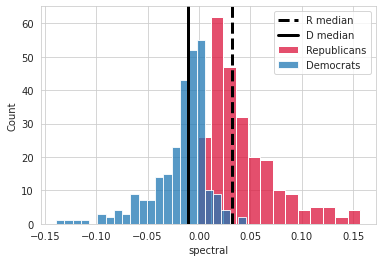

In [ ]:
sb.set_style("whitegrid")

# Laplace-transform our undirected network
nx.normalized_laplacian_matrix(G_und)
# Get the square-rooted adjacency matrix for our network
A = nx.adjacency_matrix(G_und, weight="sqrt_weight")
# Calculate the first eigenvector of the adjacency matrix
# (these are our spectral clustering values)
s = np.linalg.eig(A.toarray())[1][:,1]

# Get a list of parties for MoCs
p = [i[1]['party'] for i in list(G_und.nodes(data=True))]
# Get a list of chambers for MoCs
c = [i[1]['chamber'] for i in list(G_und.nodes(data=True))]
# Get a list of names for MoCs
n = list(G_und.nodes())

# Put pary, name, and spectral values into a dataframe
results_df = pd.DataFrame({"party": p, "spectral": s, "name": n, 'chamber':c})

# Plot spectral values for Republicans
sb.histplot(data=results_df[results_df.party == "R"], 
            color="crimson", x="spectral", label="Republicans")
plt.axvline(results_df[results_df.party == "R"].spectral.median(), 
            color="black", ls="--", label="R median", lw=3)

# Plot spectral values for Democrats
sb.histplot(data=results_df[results_df.party == "D"], 
            color="tab:blue", x="spectral", label="Democrats")
plt.axvline(results_df[results_df.party == "D"].spectral.median(), 
            color="black", label="D median", lw=3)
plt.legend()
plt.show()

It looks like the communities formed by our clustering algorithm match up pretty nicely with party! Let's see whether there's a significant difference in the spectral values of MoCs from the two parties. We could use a Pearson correlation or a t-test (and indeed these will replicate our results), but for various statistical reasons that are beyond the scope of this module I'll prefer a [Wilcoxon signed-rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test#:~:text=The%20Wilcoxon%20signed%2Drank%20test,populations%20using%20two%20matched%20samples.), which will do the same job but doesn't need a lot of the assumptions baked into other tests. The downside is that the statistic it produces isn't easily interpreted. However, it will produce a valid $P$-value for our test of whether Democrats and Republicans have different spectral values.

In [ ]:
dems = results_df[results_df.party=="D"].spectral
pubs = results_df[results_df.party=="R"].spectral
scipy.stats.ranksums(dems,pubs)

RanksumsResult(statistic=-18.638578715700223, pvalue=1.5633967417353404e-77)

**QUESTION (!!)**: Given the $P$-value above, do Democrats and Republicans have significantly different spectral values?

Double-click to type your answer.

### Louvain Clustering

The other community detection algorithm we'll look at is Louvain clustering, which is very common. Louvain clustering is what we call a "modularity maximization algorithm". That is, it's an algorithm that seeks to find communities in the network such that *modularity* for the graph is high. The math and notation for modularity is a bit dense so let me skip providing a formal definition (though see [here](https://en.wikipedia.org/wiki/Modularity_(networks)), [here](https://en.wikipedia.org/wiki/Louvain_method), and [here](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html) if you're interested). Informally, though, modularity is the sum of network connections that occur within groups normalized for what we would expect in a network which was constructed "randomly" with our network's degree distribution. We'll talk more about this "randomly" constructed network when we talk about the configuration model.

Louvain clustering starts with every node as its own cluster. Then, for each node (in a randomly selected order), it considers whether adding any of its neigbors to its group would increase the network's modularity (there's a trick for calculating this without having to compute modularity for the whole graph). If it would increase modularity, then the neighbor is added to the focal node's community. The algorithm goes through this process for all nodes in the network. If it failed to increase modularity for the whole network above some threshold, then it stops running. If it did increase modularity enough, it goes through this process again, now seeing whether modularity can be increased by combining a community with another it has connections to.

A couple of unique things about Louvain clustering you might be able to get from this description. First, it's stochastic, meaning that if you run it twice you're not guarenteed to get the same results. Second, it's what we call a *greedy algorithm*, since it makes local decisions (e.g., whether to put two nodes into the same community) without knowing whether that's the globally optimal decision. In other words, the algorithm isn't guarenteed to give us the best communities (in fact, you can prove that this algorithm can give us arbitrarily bad results; that is, you can design a simple network where the optimal modularity score is any finite number higher than what the Louvain algorithm will give you). Third, the algorithm returns potentially many communities, whereas the spectral clustering always creates two communities.

Now, normally we would just use the louvain clustering algorithm from networkx. For some reason, though, I haven't been able to get this to work on Google Colab; I'm genuinely not sure why. So, I found the code for the networkx implementation (see [here](https://networkx.org/documentation/stable/_modules/networkx/algorithms/community/louvain.html)) and copy/pasted it below. Running the cell below is functionally the same as us importing the function

In [ ]:
# Code taken directly (with a couple small changes) from NetworkX: 
# https://networkx.org/documentation/stable/_modules/networkx/algorithms/community/louvain.html

from collections import defaultdict, deque

import networkx as nx
from networkx.algorithms.community import modularity
from networkx.utils import py_random_state

__all__ = ["louvain_communities", "louvain_partitions"]

def louvain_communities(
    G, weight="weight", resolution=1, threshold=0.0000001, seed=None
):
    r"""Find the best partition of a graph using the Louvain Community Detection
    Algorithm.

    Louvain Community Detection Algorithm is a simple method to extract the community
    structure of a network. This is a heuristic method based on modularity optimization. [1]_

    The algorithm works in 2 steps. On the first step it assigns every node to be
    in its own community and then for each node it tries to find the maximum positive
    modularity gain by moving each node to all of its neighbor communities. If no positive
    gain is achieved the node remains in its original community.

    The modularity gain obtained by moving an isolated node $i$ into a community $C$ can
    easily be calculated by the following formula (combining [1]_ [2]_ and some algebra):

    .. math::
        \Delta Q = \frac{k_{i,in}}{2m} - \gamma\frac{ \Sigma_{tot} \cdot k_i}{2m^2}

    where $m$ is the size of the graph, $k_{i,in}$ is the sum of the weights of the links
    from $i$ to nodes in $C$, $k_i$ is the sum of the weights of the links incident to node $i$,
    $\Sigma_{tot}$ is the sum of the weights of the links incident to nodes in $C$ and $\gamma$
    is the resolution parameter.

    For the directed case the modularity gain can be computed using this formula according to [3]_

    .. math::
        \Delta Q = \frac{k_{i,in}}{m}
        - \gamma\frac{k_i^{out} \cdot\Sigma_{tot}^{in} + k_i^{in} \cdot \Sigma_{tot}^{out}}{m^2}

    where $k_i^{out}$, $k_i^{in}$ are the outer and inner weighted degrees of node $i$ and
    $\Sigma_{tot}^{in}$, $\Sigma_{tot}^{out}$ are the sum of in-going and out-going links incident
    to nodes in $C$.

    The first phase continues until no individual move can improve the modularity.

    The second phase consists in building a new network whose nodes are now the communities
    found in the first phase. To do so, the weights of the links between the new nodes are given by
    the sum of the weight of the links between nodes in the corresponding two communities. Once this
    phase is complete it is possible to reapply the first phase creating bigger communities with
    increased modularity.

    The above two phases are executed until no modularity gain is achieved (or is less than
    the `threshold`).

    Parameters
    ----------
    G : NetworkX graph
    weight : string or None, optional (default="weight")
        The name of an edge attribute that holds the numerical value
        used as a weight. If None then each edge has weight 1.
    resolution : float, optional (default=1)
        If resolution is less than 1, the algorithm favors larger communities.
        Greater than 1 favors smaller communities
    threshold : float, optional (default=0.0000001)
        Modularity gain threshold for each level. If the gain of modularity
        between 2 levels of the algorithm is less than the given threshold
        then the algorithm stops and returns the resulting communities.
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    Returns
    -------
    list
        A list of sets (partition of `G`). Each set represents one community and contains
        all the nodes that constitute it.

    Examples
    --------
    >>> import networkx as nx
    >>> import networkx.algorithms.community as nx_comm
    >>> G = nx.petersen_graph()
    >>> nx_comm.louvain_communities(G, seed=123)
    [{0, 4, 5, 7, 9}, {1, 2, 3, 6, 8}]

    Notes
    -----
    The order in which the nodes are considered can affect the final output. In the algorithm
    the ordering happens using a random shuffle.

    References
    ----------
    .. [1] Blondel, V.D. et al. Fast unfolding of communities in
       large networks. J. Stat. Mech 10008, 1-12(2008). https://doi.org/10.1088/1742-5468/2008/10/P10008
    .. [2] Traag, V.A., Waltman, L. & van Eck, N.J. From Louvain to Leiden: guaranteeing
       well-connected communities. Sci Rep 9, 5233 (2019). https://doi.org/10.1038/s41598-019-41695-z
    .. [3] Nicolas Dugué, Anthony Perez. Directed Louvain : maximizing modularity in directed networks.
        [Research Report] Université d’Orléans. 2015. hal-01231784. https://hal.archives-ouvertes.fr/hal-01231784

    See Also
    --------
    louvain_partitions
    """

    d = louvain_partitions(G, weight, resolution, threshold, seed)
    q = deque(d, maxlen=1)
    return q.pop()



def louvain_partitions(
    G, weight="weight", resolution=1, threshold=0.0000001, seed=None
):
    """Yields partitions for each level of the Louvain Community Detection Algorithm

    Louvain Community Detection Algorithm is a simple method to extract the community
    structure of a network. This is a heuristic method based on modularity optimization. [1]_

    The partitions at each level (step of the algorithm) form a dendogram of communities.
    A dendrogram is a diagram representing a tree and each level represents
    a partition of the G graph. The top level contains the smallest communities
    and as you traverse to the bottom of the tree the communities get bigger
    and the overal modularity increases making the partition better.

    Each level is generated by executing the two phases of the Louvain Community
    Detection Algorithm.

    Parameters
    ----------
    G : NetworkX graph
    weight : string or None, optional (default="weight")
     The name of an edge attribute that holds the numerical value
     used as a weight. If None then each edge has weight 1.
    resolution : float, optional (default=1)
        If resolution is less than 1, the algorithm favors larger communities.
        Greater than 1 favors smaller communities
    threshold : float, optional (default=0.0000001)
     Modularity gain threshold for each level. If the gain of modularity
     between 2 levels of the algorithm is less than the given threshold
     then the algorithm stops and returns the resulting communities.
    seed : integer, random_state, or None (default)
     Indicator of random number generation state.
     See :ref:`Randomness<randomness>`.

    Yields
    ------
    list
        A list of sets (partition of `G`). Each set represents one community and contains
        all the nodes that constitute it.

    References
    ----------
    .. [1] Blondel, V.D. et al. Fast unfolding of communities in
       large networks. J. Stat. Mech 10008, 1-12(2008)

    See Also
    --------
    louvain_communities
    """

    partition = [{u} for u in G.nodes()]
    mod = modularity(G, partition, resolution=resolution, weight=weight)
    is_directed = G.is_directed()
    if G.is_multigraph():
        graph = _convert_multigraph(G, weight, is_directed)
    else:
        graph = G.__class__()
        graph.add_nodes_from(G)
        graph.add_weighted_edges_from(G.edges(data=weight, default=1))

    m = graph.size(weight="weight")
    partition, inner_partition, improvement = _one_level(
        graph, m, partition, resolution, is_directed, seed
    )
    improvement = True
    while improvement:
        yield partition
        new_mod = modularity(
            graph, inner_partition, resolution=resolution, weight="weight"
        )
        if new_mod - mod <= threshold:
            return
        mod = new_mod
        graph = _gen_graph(graph, inner_partition)
        partition, inner_partition, improvement = _one_level(
            graph, m, partition, resolution, is_directed, seed
        )



def _one_level(G, m, partition, resolution=1, is_directed=False, seed=None):
    """Calculate one level of the Louvain partitions tree

    Parameters
    ----------
    G : NetworkX Graph/DiGraph
        The graph from which to detect communities
    m : number
        The size of the graph `G`.
    partition : list of sets of nodes
        A valid partition of the graph `G`
    resolution : positive number
        The resolution parameter for computing the modularity of a partition
    is_directed : bool
        True if `G` is a directed graph.
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.

    """
    node2com = {u: i for i, u in enumerate(G.nodes())}
    inner_partition = [{u} for u in G.nodes()]
    if is_directed:
        in_degrees = dict(G.in_degree(weight="weight"))
        out_degrees = dict(G.out_degree(weight="weight"))
        Stot_in = [deg for deg in in_degrees.values()]
        Stot_out = [deg for deg in out_degrees.values()]
        # Calculate weights for both in and out neighbours
        nbrs = {}
        for u in G:
            nbrs[u] = defaultdict(float)
            for _, n, wt in G.out_edges(u, data="weight"):
                nbrs[u][n] += wt
            for n, _, wt in G.in_edges(u, data="weight"):
                nbrs[u][n] += wt
    else:
        degrees = dict(G.degree(weight="weight"))
        Stot = [deg for deg in degrees.values()]
        nbrs = {u: {v: data["weight"] for v, data in G[u].items() if v != u} for u in G}
    rand_nodes = list(G.nodes)
    np.random.seed(seed)
    np.random.shuffle(rand_nodes)
    nb_moves = 1
    improvement = False
    while nb_moves > 0:
        nb_moves = 0
        for u in rand_nodes:
            best_mod = 0
            best_com = node2com[u]
            weights2com = _neighbor_weights(nbrs[u], node2com)
            if is_directed:
                in_degree = in_degrees[u]
                out_degree = out_degrees[u]
                Stot_in[best_com] -= in_degree
                Stot_out[best_com] -= out_degree
                remove_cost = (
                    -weights2com[best_com] / m
                    + resolution
                    * (out_degree * Stot_in[best_com] + in_degree * Stot_out[best_com])
                    / m**2
                )
            else:
                degree = degrees[u]
                Stot[best_com] -= degree
                remove_cost = -weights2com[best_com] / m + resolution * (
                    Stot[best_com] * degree
                ) / (2 * m**2)
            for nbr_com, wt in weights2com.items():
                if is_directed:
                    gain = (
                        remove_cost
                        + wt / m
                        - resolution
                        * (
                            out_degree * Stot_in[nbr_com]
                            + in_degree * Stot_out[nbr_com]
                        )
                        / m**2
                    )
                else:
                    gain = (
                        remove_cost
                        + wt / m
                        - resolution * (Stot[nbr_com] * degree) / (2 * m**2)
                    )
                if gain > best_mod:
                    best_mod = gain
                    best_com = nbr_com
            if is_directed:
                Stot_in[best_com] += in_degree
                Stot_out[best_com] += out_degree
            else:
                Stot[best_com] += degree
            if best_com != node2com[u]:
                com = G.nodes[u].get("nodes", {u})
                partition[node2com[u]].difference_update(com)
                inner_partition[node2com[u]].remove(u)
                partition[best_com].update(com)
                inner_partition[best_com].add(u)
                improvement = True
                nb_moves += 1
                node2com[u] = best_com
    partition = list(filter(len, partition))
    inner_partition = list(filter(len, inner_partition))
    return partition, inner_partition, improvement


def _neighbor_weights(nbrs, node2com):
    """Calculate weights between node and its neighbor communities.

    Parameters
    ----------
    nbrs : dictionary
           Dictionary with nodes' neighbours as keys and their edge weight as value.
    node2com : dictionary
           Dictionary with all graph's nodes as keys and their community index as value.

    """
    weights = defaultdict(float)
    for nbr, wt in nbrs.items():
        weights[node2com[nbr]] += wt
    return weights


def _gen_graph(G, partition):
    """Generate a new graph based on the partitions of a given graph"""
    H = G.__class__()
    node2com = {}
    for i, part in enumerate(partition):
        nodes = set()
        for node in part:
            node2com[node] = i
            nodes.update(G.nodes[node].get("nodes", {node}))
        H.add_node(i, nodes=nodes)

    for node1, node2, wt in G.edges(data=True):
        wt = wt["weight"]
        com1 = node2com[node1]
        com2 = node2com[node2]
        temp = H.get_edge_data(com1, com2, {"weight": 0})["weight"]
        H.add_edge(com1, com2, **{"weight": wt + temp})
    return H


def _convert_multigraph(G, weight, is_directed):
    """Convert a Multigraph to normal Graph"""
    if is_directed:
        H = nx.DiGraph()
    else:
        H = nx.Graph()
    H.add_nodes_from(G)
    for u, v, wt in G.edges(data=weight, default=1):
        if H.has_edge(u, v):
            H[u][v]["weight"] += wt
        else:
            H.add_edge(u, v, weight=wt)
    return H

So now that we've got that out of the way, we can us our Louvain clustering algorithm to find communities in our network.

In [ ]:
# Detect communities in our network
comms = louvain_communities(G, seed=8675309, resolution=0.4)

# Create an easy way to look up the community of a given MoC
name_comm_map = {}
for i in range(len(comms)):
  for n in comms[i]:
    name_comm_map[n] = i

# Add community and whether each MoC is a Republican to our results dataframe
results_df['louvain'] = results_df.name.apply(lambda x: name_comm_map[x])
results_df['Republican'] = results_df.party.apply(lambda x: int(x == "R"))

To see whether our Louvain communities map onto party, let's create a barplot showing the proportion of each community that is made up of Republicans.

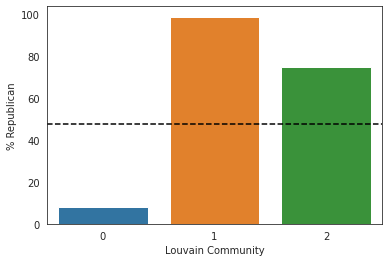

In [ ]:
sb.set_style("white")
sb.barplot(data=results_df, x="louvain", y="Republican", ci=False,
           estimator=lambda x: np.mean(x)*100)
plt.ylabel("% Republican")
plt.xlabel("Louvain Community")
plt.axhline(results_df.Republican.mean()*100, color="black", ls="--")
plt.show()

Give those values, it does appear that the Louvain algorithm significantly divded parties into distinct communities. To formally test this, we'll perform a [chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test). This test lets us see whether two categorical variables (in our case, party and Louvain community) are independent of one another.

In [ ]:
# Create a contingency table, or a the number of Republicans/Democrats per community
ct = pd.crosstab(index=results_df['Republican'], 
                 columns=results_df['louvain']).to_numpy()
print(ct)

# Perform the Chi2 test
chi2, p, dof, expected = scipy.stats.chi2_contingency(ct)
print("Chi2: {0}, P: {1}".format(chi2, p))

[[248   2  18]
 [ 21 171  53]]
Chi2: 373.6234646051606, P: 7.390869026200613e-82


**QUESTION (!!)**: According to our chi-squared test, are the communities estimated from our Louvain clustering independent of party?

Double-click to write your response.

## Graph-Level Characteristics

So far we've looked at individual position (centrality) and group structure (community detection) within the network. Finally, we'll look at graph-level characteristics, or things we can measure about tendencies in the network as a whole. For instance, we might measure how often reciprocity happens in our network (i.e., how often does one MoC mention a second MoC if the second MoC has mentioned the first?). You might measure the epidemic threshold of a network, or how infectious a disease needs to be on average to infect the entire network (which [turns out](https://cs.stanford.edu/people/jure/pubs/virus-tissec.pdf) to be the inverse of the largest eigenvalue of the adjacency matrix). You might measure the [robustness](https://en.wikipedia.org/wiki/Robustness_of_complex_networks) of the network, or how many "failures" are needed for the network to fall apart (see [here](https://www.pnas.org/doi/10.1073/pnas.1818013116?cookieSet=1) for the coolest application of this that I've seen). We're going to focus on trait assorativity--the degree to which nodes with the same "traits" (e.g., are of the same political party) tend to interact--and the average clustering coefficient, or how often "the friend of my friend is my friend" (or how common "triangles" are in the graph).

Before we do that, though, we'll talk about how we'll make those measures meaningful--by comparing them to "randomly generated" networks.


### The Configuration Model

To determine whether a given network has more or less of characteristic (e.g., reciprocity) than we would expect "by chance", we need to determine what "by chance" means. There are various ways to do this, but we're going to talk about the configuration model specifically.

So, let's say we observed 50\% of connections in our network were reciprocal. The idea behind the configuration model is to generate many networks that are randomly generated but have the same degree distribution (i.e., the same number of nodes with one connection, the same number of nodes with two connections, etc.) as our observed network. Then, we measure the degree of reciprocity in each of those "random" networks. From that, we can see how "unlikely" the degree of reciprocity we observed in our network actually was.

So how do we generate these "random" networks? Let's start with an undirected, unweighted network as diagramed below in the "Observed" pane.

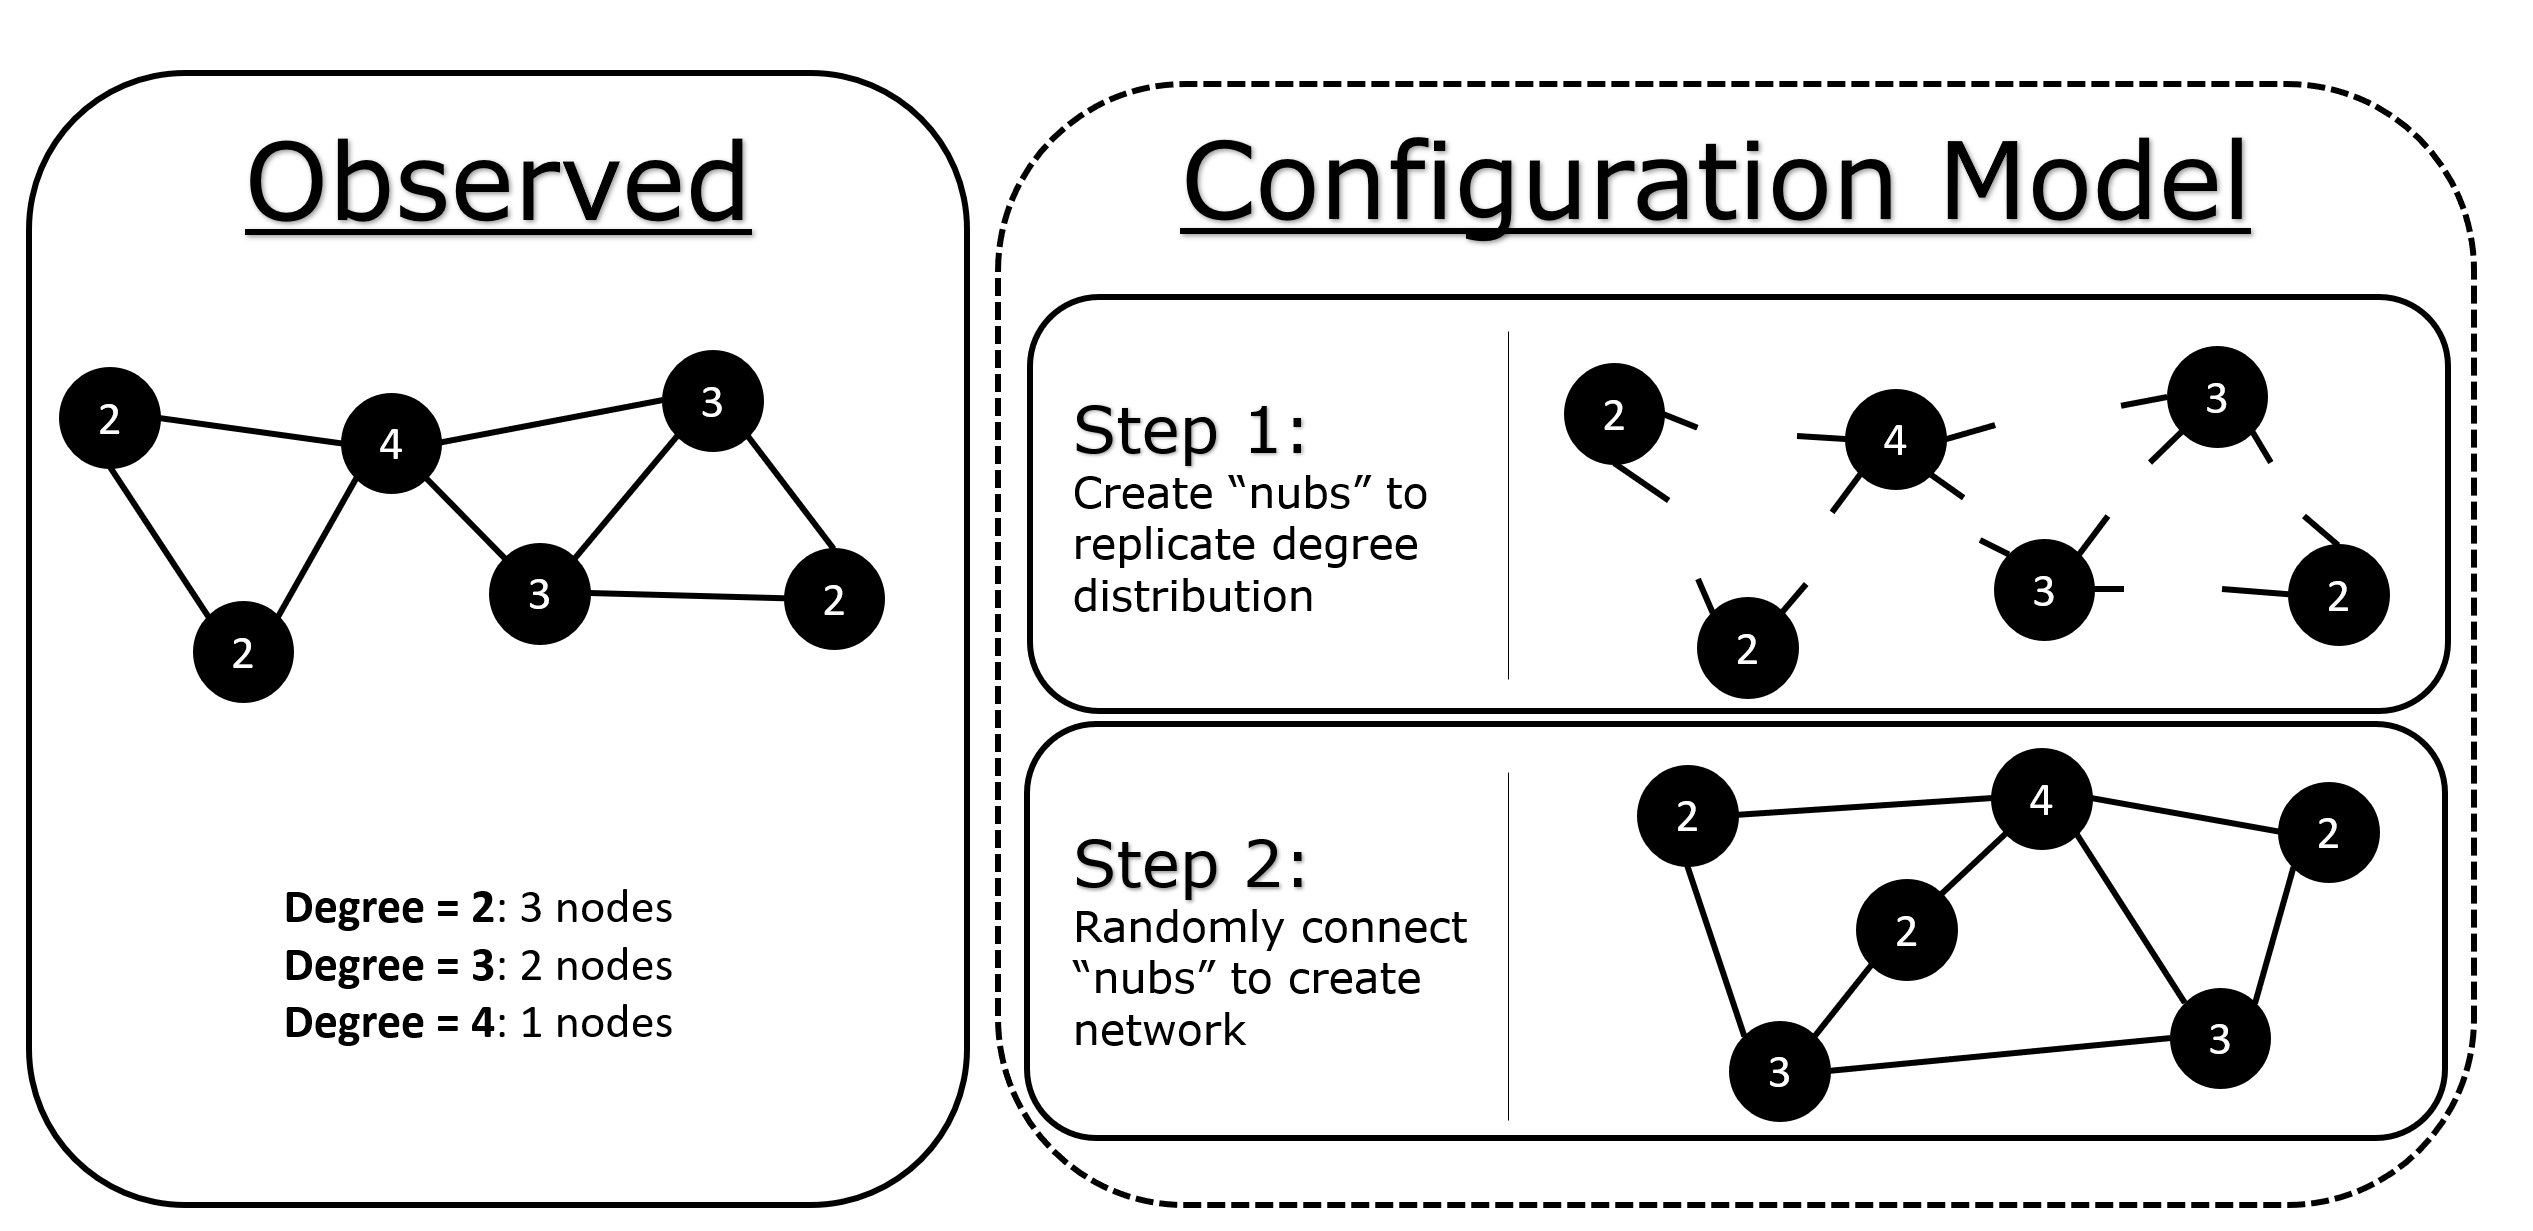

We note that there are three nodes that have a degree of 2, two nodes with a degree of 3, and one node with a degree of 4. We call this our "degree distribution". Each iteration of our configuration model involves two steps. 

1. In the first step, we generate "nubs" that match our degree distribution. A "nub" is basically a node that "wants" to have a certain number of connections. We'll create three nubs that want two ties, two nubs that want three tries, and one nub that wants four ties. If each nub gets exactly the number of connections it wants, then we'll have created a network with the same degree distribution as our observed network. 

2. In the second step, select two nubs who still want a connection and connect them, then repeat until all nubs have the number of connections they want (or until there is only one nub that wants a connection; in which case you might either add a connection between that nub and a random nub or restart the whole process, depending on the implementation). 

Now you've "randomly" generated a network with a matching degree distribution! If we're testing the statistical significance of a network characteristic, we'll do this many times, measuring that characteristic for the randomly generated network each time. Then, once when we have an entire distribtution of these values for random networks, we can see how likely it is that our observed network was pulled from that distribution.

**Technical paragraph, feel free to skip.** How do we actually compare our observed value to this "null" distribution? The most technically correct answer is to perform a [binomial test](https://en.wikipedia.org/wiki/Binomial_test) to see if we can rejejct the "null hypothesis" that our observed measure is "less extreme" than 5% (if our threshold for significance is 0.05) of our random networks. What is probably the next best answer is to assume our "null distribution" is asymptotically normal and approximates the [sampling distribution](https://en.wikipedia.org/wiki/Sampling_distribution) of our network characteristic. In that case, we would measure how many standard deviations away our observed measure is from the mean of our null distribution and calculate the appropriate [CDF](https://en.wikipedia.org/wiki/Cumulative_distribution_function). What we're going to do is probably the laziest way to do this, which is to just take the proportion of observations in our null distribution that are "more extreme" than our observed value as our $P$-value. Technically this is an estimate of the $P$-value (specifically it's the [maximum likelihood estimate](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#:~:text=In%20statistics%2C%20maximum%20likelihood%20estimation,observed%20data%20is%20most%20probable.)), but it should be good enough for our purposes.

The configuration model extends pretty intuitively to both directed networks (but each nub has a number of incoming and outgoing connections it wants) and weighted networks (but each unit of weight counts as a seperate tie and nubs are allowed to connect to each other multiple times). However, networkx doesn't have a good implementation of a weighted assorativity coefficient (although it wouldn't be very difficult to code this up), so we'll do all of this section with $A^{-W}$ (the unweighted version of our network).

Note that the only thing we need to run the configuration model is the degree distribution from our observed network. In the cell below, I gather that information from our network.

In [ ]:
in_degrees = dict(G.in_degree())
d_in = [in_degrees[n] for n in G.nodes()]

out_degrees = dict(G.out_degree())
d_out = [out_degrees[n] for n in G.nodes()]

### Assortativity Coefficient

One phenomenon we observe across all kinds of social networks is [homophily](https://en.wikipedia.org/wiki/Homophily), or the tendency for "birds of a feather" to "flock together" (see [here](https://www.annualreviews.org/doi/10.1146/annurev.soc.27.1.415) the famous review article on the subject). Basically, sociologists have found that there is an empirical tendency in human social networks where people tend to interact with other who are similar to them (in a surprisingly numerous variety of ways). This is often the result of features of social structure (e.g., schools in the U.S. tend to be *de facto* racially segregated because of a history of racist housing policies and other contemporary social processes, which means White folks and Black folks in the U.S. don't have as many opportunities to become friends) as well as individual preferences (e.g., even when opportunity for interaction is the same, people tend to prefer to interact with people who are roughly the same age as them). The general term for this in network science is *trait assortativity*. We're going to test whether we observe assortativity in our network on the basis of political party.

How do we measure trait assortativity? If we construct a matrix $E$ where $E_{i,j}$ is the proportion of tie weight that is directed from nodes of type $i$ to nodes of type $j$, then the assortativity coefficient is:

$\frac{Tr(E) - ||E^{2}||}{1 - ||E^{2}||}$

Where $Tr(M)$ is the [trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)) of the matrix $M$ (i.e., the sum of the diagonol values) and $||M^{2}||$ is the sum of the square of all values in the matrix $M$.

In the cell below, I measure trait assortativity on the basis of party in our network. Then, I test how extreme this observed value is via the configuration model.


In [ ]:
# Measure the observed value
observed = nx.attribute_assortativity_coefficient(G, "party")

# Create a receptacle for the null distribution
null_dist = []

# Create an easy-to-use mapping of nodes in the null network to party
p_null = {i: n[1]['party'] for i, n in enumerate(G.nodes(data=True))}

# Set a random seed so we all get the same answer
np.random.seed(86753009)

# Knowing our effect sizes, 500 should be enough iterations. When running
# this for real, though, I'd recommend at least 2000 iterations
n_iter = 500

for i in range(n_iter):

  # Create a null network using the configuration model
  null = nx.directed_configuration_model(d_in, d_out, 
                                         seed=round(np.random.random() * 100000))
  
  # Measure the assortativity coefficient for the null network
  nx.set_node_attributes(null, p_null, "party")

  # Append that measure to our list
  null_dist.append(nx.attribute_assortativity_coefficient(null, "party"))

  # Let us know every time we complete 100 iterations
  if (i+1) % 100 == 0:
    print("{0}/{1} iterations complete!".format(i+1, n_iter))

100/500 iterations complete!
200/500 iterations complete!
300/500 iterations complete!
400/500 iterations complete!
500/500 iterations complete!


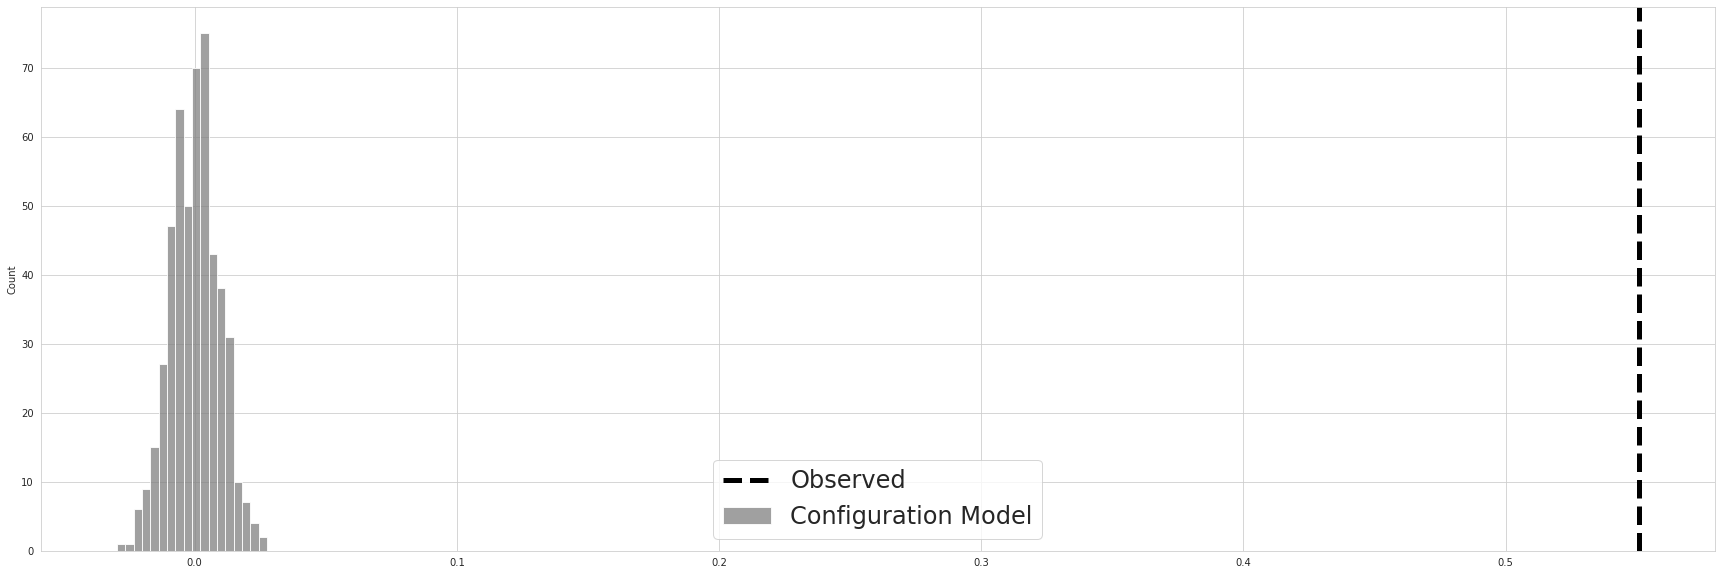

The probability that we would get this "extreme" of a value by chance is approximately 0.0%


In [ ]:
# Plot the results
sb.set_style("whitegrid")
plt.figure(figsize=(30,10))
plt.axvline(observed, color="black", ls="--", label="Observed", lw=5)
sb.histplot(null_dist, color="grey", label="Configuration Model")
plt.legend(fontsize=24)
plt.show()

# Calculate and present our estimate of the P-value
p_val = np.mean(null_dist > observed)*2
print('The probability that we would get this "extreme" of a value by chance is approximately {}%'.format(p_val))

**QUESTION (!!)**: Do MoCs tend to mention other MoCs from their own party more than MoCs from the other parties? How can you tell?

### Average Clustering Coefficient

The next characteristic we'll measure about our network is the average [clustering coefficient](https://en.wikipedia.org/wiki/Clustering_coefficient). I'll skip the formalities here because the notation gets really cumbersome. Basically, though, we can define a clustering coefficient for any individual node as the proportion of possible "triangles" that could be formed with me and all my neighbors (i.e., completely connected triads. If I have two neighbors, the three of us could form one triangle. If I have three neighbors, we could form three triangles). Then, the average clustering coefficient is the average of that clustering coefficient for all nodes in the network.

In the cell below, I measure this value for our network and then test its significance with the configuration model.

In [ ]:
# Measure the observed value
observed = nx.average_clustering(G)

# Create a receptacle for the null distribution
null_dist = []

# Set a random seed so we all get the same answer
np.random.seed(86753009)

# Knowing our effect sizes, 500 should be enough iterations. When running
# this for real, though, I'd recommend at least 2000 iterations
n_iter = 500

for i in range(n_iter):

  # Create a null network using the configuration model
  null = nx.directed_configuration_model(d_in, d_out, 
                                         seed=round(np.random.random() * 100000))
  
  # Measure the assortativity coefficient for the null network
  null_dist.append(nx.average_clustering(nx.DiGraph(null)))

  # Let us know every time we complete 100 iterations
  if (i+1) % 100 == 0:
    print("{0}/{1} iterations complete!".format(i+1, n_iter))

100/500 iterations complete!
200/500 iterations complete!
300/500 iterations complete!
400/500 iterations complete!
500/500 iterations complete!


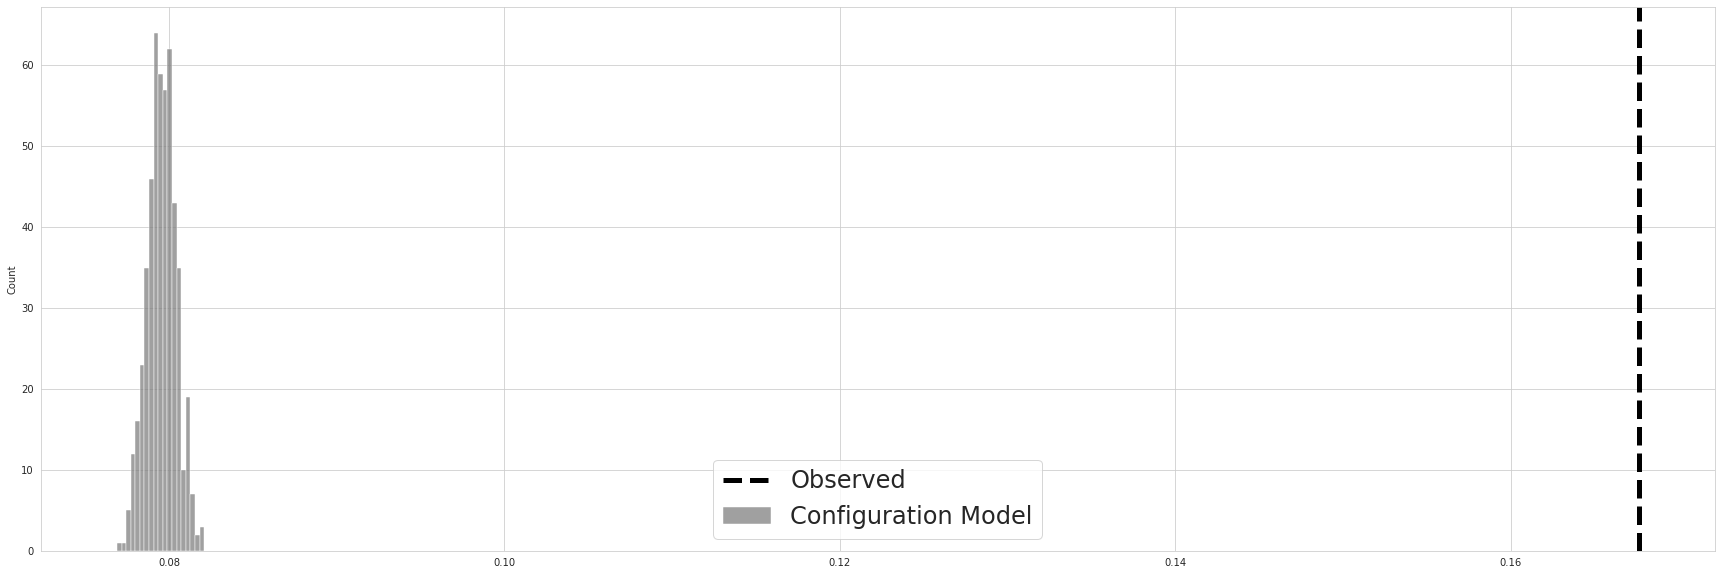

The probability that we would get this "extreme" of a value by chance is approximately 0.0%


In [ ]:
sb.set_style("whitegrid")
plt.figure(figsize=(30,10))
plt.axvline(observed, color="black", ls="--", label="Observed", lw=5)
sb.histplot(null_dist, color="grey", label="Configuration Model")
plt.legend(fontsize=24)
plt.show()
p_val = np.mean(np.array(null_dist) > observed)*2
print('The probability that we would get this "extreme" of a value by chance is approximately {}%'.format(p_val))

**QUESTION (!!)**: What do these results tell us?

# Text Analysis

So far, we've been looking at the structure of mentions between MoCs. Now, we're going to turn to analyzing the content of the tweets produced by MoCs using automated text analysis. First, we're going to need to do some "pre-processing", or take our natural/messy data and transform into (relatively) clean data for us to analyze.

## Pre-processing

(Feel free to skip the "Pre-processing" subsection if you're not interested in it)

Pre-processing data means to standardize it and prepare it for proper analysis. For text data, this typically involves some subset of the following steps: lowercasing, lemmatizing or stemming, removing stop words and/or punctuation, normalizing, and tokenization. What pre-processing steps you should take depends on both your data and what you're trying to figure out. Here, we'll lowercase, remove stop words, and tokenize our text, which I would say is a reasonable starting point for many text analysis projects in people analytics (and you will likely uncover things you need to change as you carry out your analysis).

### Removing Stopwords

"Stop words" are tokens (meaningful chunks of strings; in our case typically single words) that are removed from text, typically because they either carry very little information or because they might provide misleading information in our analyses. For instance, in English, it's very rare for anyone to be interested in how often someone uses "the", "a", or "of". Depending on one's analysis, however, keeping these words in the corpus might actually lead to strange results because they appear so often in contemporary American English. In other kinds of analysis, you might want to not remove any stop words at all. As you might imagine, there's not a single, authoritative list of stop words in any language. There are, however, some standard ones that serve as good starting points.

Here we're going to select the fairly extensive list of stop words provided by NLTK (natural language tool kit) which we downloaded at the beginning of this notebook. Depending on your specific corpus and the analyses you want to run, you might want to add or remove some items from this list. For instance, most punctuation will not be removed from tweets if we just remove these stop words (though it's also common to remove all punctuation as an entirely separate pre-processing step). First, let's take a look at [NLTK](https://en.wikipedia.org/wiki/Natural_Language_Toolkit)'s list of English stop words.

In [ ]:
stops = stopwords.words('english')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

As I look this over, there's some punctuation I'll want to remove from these tweets, but there are enough punctuation I'd like to keep in that I'd rather just add them to my stop words list instead of making the removal of punctuation a whole other preprocessing step. There are also some words that are typically not very meaningful, but that might be interesting in the context of MoCs' Twitter accounts, so I'll remove those from our list of stop words.

In [ ]:
#Add tokens to our list of stop words
stops += ['.',',','’',':','&','!','qt','-','"','?','“','”',')','(','/',"'",'–',
          '*',';','‘','>','<']

#Remove tokens from our list of stop words
for w in ['he','we','she','our','if']:
  stops.remove(w)

### Tokenizing Text

Next up we're going to define our *tokenizer*, or an object that's going to change our natural strings (e.g. "people analytics is great!") into lists of meaningful string chunks (e.g. ["people", "analytics", "is", "great", "!"]. For our analyses, this will generally be easier to deal with. 

Now, we could certainly define our own tokenizer from scratch. The simplest would probably be a one-line function that takes in a string and splits it on each space like `tknzr = lambda x: x.split(' ')`, and that that would be fine in many cases (assuming you've removed all punctuation, which we don't do in our case). However, most corpora have a quirk or two that will break this simple tokenizer. For instance, in our Twitter corpus, some tweets contain "\n", which is a newline character or an "enter" keystroke. Our simple tokenizer won't handle this well: "\nthis" and "this" will end up being two different words, for instance. Luckily, NLTK has a handy tokenizer made specifically for tweets, so we'll go ahead and just use that.

It's also worth mentioning that some times you will want to not only look at "unigrams" (single words) but also "bigrams" (two adjacent words) and/or "trigrams" (three consecutive words). This is pretty straight-forward to get after you've tokenized your string (see e.g. documentation for [nltk.util.bigrams](http://www.nltk.org/api/nltk.html#nltk.util.bigrams) and [nltk.util.trigrams](https://www.nltk.org/api/nltk.html#nltk.util.trigrams)), but we won't get into that here.

In [ ]:
tknzr = TweetTokenizer()
tknzr.tokenize("I'm really loving people analytics :)")

["I'm", 'really', 'loving', 'people', 'analytics', ':)']

### Pulling it all together

Now we'll put it all together into a single function that will take in a string and clean it.

In [ ]:
def clean_tweet(s, stops=stops, tknzr=tknzr):
  '''
  Function that takes in a string and returns a "clean" list of words.

  s should be a string, stops should be an iterable (e.g. a list or set), and 
  tknzr should be an object with a method .tokenize() which takes in a string 
  and returns an iterable (e.g. a list or set).
  '''

  #lowercase the string
  s = s.lower()

  #tokenize the string
  s = tknzr.tokenize(s)

  #remove stop words
  s = [w for w in s if w not in stops]

  #remove empty string chunks
  s = [w for w in s if len(w) > 0]

  return s

Now we'll create a new pandas dataframe, `tweet_df`, that will retain only a couple of key columns of `raw_tweet_df`; will not have any retweets or quote tweets in it (heuristically identified by whether a tweet contains either a "RT @" or a "QT" in its raw text); and, instead of the raw text of the tweet, it will have the pre-processed text obtained from our function `clean_tweet`.

In [ ]:
#Create a new pandas dataframe with only a couple columns of raw_tweet_df
tweet_df = raw_tweet_df[['screen_name','text']]

#Remove retweets from this new dataframe
tweet_df = tweet_df[tweet_df.text.apply(lambda x: ('RT @' not in x) and ('QT' not in x))]

#Clean the tweets' text
tweet_df.text = tweet_df.text.apply(clean_tweet)

tweet_df

screen_name                                               text
0        SenMarkKelly  [icymi, valley, metro, going, receive, $, 49.4...
1        SenMarkKelly  [#otd, 7, years, ago, protections, people, pre...
2        SenMarkKelly  [year, may, we, expecting, hope, 2021, fresh, ...
3      RepKweisiMfume  [2020, brought, our, communities, historic, hi...
4     SenatorLoeffler  [2020, unprecedented, year, many, ways, never,...
...               ...                                                ...
3882   Norma4Congress  [history, remember, day, @gop, choosing, obstr...
3884     RepCloakroom                     [amendment, debate, concluded]
3885     RepCloakroom  [recorded, vote, requested, rep, lee, d-nv, am...
3887    Rep_Stansbury  [#investact, house, floor, tonight, invest, cr...
3888    Rep_Stansbury  [jan, 6, assault, our, capitol, one, darkest, ...

[244308 rows x 2 columns]

Now we'll want to combine our `tweet_df` with the `meta_df` we downloaded from GitHub early in this module. Doing so will allow us to map every tweet to a specific MoC and also to that MoC's political party and/or chamber. Luckily, pandas has a very handy `.merge()` method that will allow us to do this with a single line of code.

In [ ]:
#Merge tweet_df and meta_df
df = tweet_df.merge(meta_df, on="screen_name", how="inner")

#Drop all tweets coming from a MoC who is not a Democrat or Republican
df = df[df.party.apply(lambda x: x in ['D', 'R'])]

#Drop any tweets that were e.g. only stop words
df = df[df.text.apply(lambda x: len(x) > 0)]

#Add a column telling us how long each tweet is
df['length'] = df.text.apply(len)

df

screen_name                                               text  \
0         SenMarkKelly  [icymi, valley, metro, going, receive, $, 49.4...   
1         SenMarkKelly  [#otd, 7, years, ago, protections, people, pre...   
2         SenMarkKelly  [year, may, we, expecting, hope, 2021, fresh, ...   
3         SenMarkKelly  [beating, pandemic, going, take, teamwork, rea...   
4         SenMarkKelly  [arizona, small, businesses, backbone, our, ec...   
...                ...                                                ...   
215927  MorganGriffith  [roanoke, times, morgan, griffith, takes, plun...   
215928     DrBurgessTX  [honored, friend, secretary, @mikepompeo, head...   
215929      AlLawsonJr  [we, celebrate, dr, humphries, truly, built, e...   
215930  Eshoo4Congress  [celebrating, pride, 2021, assemblymember, @ev...   
215931  Eshoo4Congress  [we, hope, able, join, us, inspiring, conversa...   

                      name chamber party account_type  length  
0               Mark Kelly  senate     D       office      24  
1               Mark Kelly  senate     D       office      23  
2               Mark Kelly  senate     D       office      21  
3               Mark Kelly  senate     D       office      11  
4               Mark Kelly  senate     D       office      16  
...                    ...     ...   ...          ...     ...  
215927     Morgan Griffith   house     R     campaign       7  
215928  Michael C. Burgess   house     R     campaign      15  
215929           Al Lawson   house     D     campaign      19  
215930          Anna Eshoo   house     D     campaign       7  
215931          Anna Eshoo   house     D     campaign      16  

[215161 rows x 7 columns]

## Variation in the Content of MoCs' Twitter Language

In this section, we're going to look at analyzing this Twitter data for variation in term frequencies. There are many different kinds of text analysis, but we're only going to focus on term frequency analysis, which is the simplest conceptually and mathematically. If you're interested in other kinds of automated text analysis, see [my paper](https://osf.io/preprints/socarxiv/htnej/) on "three families of automated text analysis".

We're also only going to explore a limited set of analyses within term frequency analysis. If you want to explore term frequencies more than we do in this module, check out [this](https://github.com/ctass/fall-workshop-2019/blob/master/First_Workshop_2019.ipynb) Jupyter notebook that I put together for the Stanford Student Group on Computational Text Analysis in the Social Sciences (CTASS). If you download this file, you should be able to use it in Google Colab through the "File > Upload notebook" option.

### Deductive: Dictionary Analysis

Now that we've pre-processed our text data, let's discuss how to test whether term frequencies significantly vary along elements of the texts' meta-data.

Our first method is what is often referred to as "dictionary analysis". This method allows to see whether groups use some category of words more or less often. For instance, we might test whether one group of individuals use "swear words" more or less often than another group. The steps in a typical dictionary analysis are: select the set of words of interest, count how often they are used in each document (i.e., tweet), and then correlate those counts with meta-data of the text (e.g., the party of the MoC who produced each tweet).

Below I define a set of functions, culminating in the `dict_vec` function, that allow you to perform your own dictionary analyses with only a couple lines of code. In essence, these three functions allow you to define your own "dictionary" and then determine the prevelance of each category defined in that dictionary in a string or list you also pass to it.

In [ ]:
def regexify(s):
  #Helper function for dictify below
  if s[-1] == "*":
    return '(?<!\w){}\w*?[\s.]'.format(s[:-1])
  else:
    return '(?<!\w){}[\s.]'.format(s)

def dictify(d):
  '''
  Takes in a dictionary where keys are categories and the values are lists of
  words that indicate each category. Outputs a dictionary that can be used by
  dict_vec below. Helpful if you are not comfortable with regular expressions,
  but is limited by design. There is one key functionality built in: if a word
  ends in a "*", then the generated regular expression will look for words with
  any additional letters at the end of it (e.g. "eat*" captures "eat", 
  "eating", "eats", etc.). The same does not hold for "*" at the beginning of a 
  word.
  '''
  return {k: [regexify(w) for w in d[k]] for k in d}

def dict_vec(s, d, clean=clean_tweet):
  '''
  Takes in a string and a dictionary which is structured {C1: [W11, W21, ...],
                                                          C2: [W12, W22, ...]}
  Where Cx is the name of a category and Wxy is a regular expression which
  indicates a string 'more belongs' in category x and outputs a dictionary
  structured {C1: S1, C2: S2, ...} where Cx is the name of a category and
  Sx is how much the passed string 'belongs' in that category.
  '''

  #Create a receptacle for the results
  results = {k: 0 for k in d.keys()}

  #Start a counter for the total number of dictionary words
  results['_total_'] = 0

  if type(s) == str:
    s = clean(s)

  #Turn the tokenized list into a string (it works better for regular expressions)
  s = ' '.join(s)

  #For each category in the dictionary
  for k in d.keys():

      #Create a single regular expression that will capture any word in the category
      combined_re = "(" + ")|(".join(d[k]) + ")"

      #Count the number of times a word in this category appears in the text
      count = len(re.findall(combined_re,s+' '))

      #Add that count to the category count
      results[k] += count

      #Add that count to the total number of dictionary words
      results['_total_'] += count

      
  results['_len_'] = len(clean(s))

  return results

Here's a toy example of how to use the `dictify` and `dict_vec` functions.

In [ ]:
#A list of words associated with politics
politic_words = ['politi*', 'congressional hearings', 'president*', 
                 'democrat*', 'republican*']

#A list of words associated with food
food_words = ['tuna', 'pineapple', 'burger', 'din*', 'eat*']

#Create a dictionary
new_dict = {'politics': politic_words, 
            'food': food_words}

#Pass this dictionary to the dictify function
new_dict = dictify(new_dict)

# Count how often each kind of word appears in a document
dict_vec('The politicians at the very political congressional hearings are eating him alive', 
         new_dict)

{'politics': 3, 'food': 1, '_total_': 4, '_len_': 6}

One note to make here is what the "*" does. This is a helpful feature that makes `'president*'` capture any word that begins with "president" (e.g. "president", "presidential", "presidents", "president's", "presidents'").

Now, to demonstrate dictionary analysis, we're going to use the words that [Gaucher et al (2011)](https://psycnet.apa.org/fulltext/2011-04642-001.html) found made men or women more or less likely to want to apply for a job. As a shorthand, we'll call these "masculine" and "feminine" words. We're going to test whether Democrats or Republicans are more likely to use masculine words relative to how often they use feminine words. In the below cell I just state what these words are and save them as variables to use later.

In [ ]:
masculine_words = ['active', 'adventurous', 'aggress*', 'ambitio*', 'analy*', 
                   'assert*', 'athlet*', 'autonom*', 'boast*', 'challeng*', 
                   'compet*', 'confident', 'courag*', 'decide', 'decisive', 
                   'decision*', 'determine*', 'dominant', 'domina*', 'force*', 
                   'greedy', 'headstrong', 'hierarch*', 'hostil*', 'implusive', 
                   'independen*', 'individual*', 'intellect*', 'lead*', 'logic', 
                   'masculine', 'objective', 'opinion', 'outspoken', 'persist', 
                   'principle*', 'reckless', 'stubborn', 'superior', 
                   'self-confiden*', 'self-sufficien*', 'self-relian*']

feminine_words = ['affectionate', 'child*', 'cheer*', 'commit*', 'communal', 
                  'compassion*', 'connect*', 'considerate', 'cooperat*', 
                  'depend*', 'emotiona*', 'empath*', 'feminine', 'flatterable', 
                  'gentle', 'honest', 'interpersonal', 'interdependen*', 
                  'interpersona*', 'kind', 'kinship', 'loyal*', 'modesty', 
                  'nag', 'nurtur*', 'pleasant*', 'polite', 'quiet*', 'respon*', 
                  'sensitiv*', 'submissive', 'support*', 'sympath*', 'tender*', 
                  'together*', 'trust*', 'understand*', 'warm*', 'whin*', 
                  'yield*']

Next, we turn this into a dictionary we can use in our `dict_vec` function.

In [ ]:
gender_dict = dictify({'masculine': masculine_words,
                       'feminine': feminine_words})

Now, when we run this analysis, we could reasonably quantify our measure of interest at the level of the tweet. There are various reasons why this isn't ideal in our case, however (the main reasons being that we'd be treating each tweet as if it comes from a new person when that is definitely not true; also, because tweets are so short, the signal at the tweet level can be unreliable). Therefore, we're actually going to aggregate our data to the level of MoCs. That is, instead of each "document" being a single tweet produced by a MoC, each "document" will be all the tweets a MoC produces combined. In the top half of the cell below, I create `moc_df`, which fits this description.

Then, below that, I apply the `dict_vec` function to our new MoC-level dataset, extracting, for each MoC, how often they use masculine words relative to feminine words. Specifically, we measure the following:

$D = \frac{C_{M} - C_{F}}{L}$

Where $C_{M}$ is the number of times a MoC uses a "masculine" word, $C_{F}$ is the number of times a MoC uses a "feminine" word, and $L$ is the total number of words used by the MoC. Positive numbers mean the MoC used more "masculine words" than "feminine words", while negative numbers mean the MoC used more "feminine words" than "masculine words". I've tried several other measures and all have replicated the results below.

In [ ]:
#Aggregate our new dataframe to the MoC level
moc_df = df[['name','party','chamber','text']]
moc_df = moc_df.groupby(['name','party','chamber']).sum().reset_index()

# Get our measure of difference in gendered language
moc_df['gender_dict'] = moc_df.text.apply(lambda x: dict_vec(x, gender_dict))
moc_df['D'] = moc_df.gender_dict.apply(lambda x: (x['masculine'] - x['feminine'])/x['_len_'])

moc_df

name party chamber  \
0         Abby Finkenauer     D   house   
1      Abigail Spanberger     D   house   
2          Adam Kinzinger     R   house   
3             Adam Schiff     D   house   
4              Adam Smith     D   house   
..                    ...   ...     ...   
565             Will Hurd     R   house   
566  Xochitl Torres Small     D   house   
567             Young Kim     R   house   
568         Yvette Clarke     D   house   
569           Zoe Lofgren     D   house   

                                                  text  \
0    [@danwasta, say, 3, gratefuls, end, every, day...   
1    [actions, behavior, president, example, americ...   
2    [@reduxvernon, ask, trump, he, asked, us, time...   
3    [2020, challenged, us, many, ways, revealing, ...   
4    [ndaa, broad, deep, support, testament, merits...   
..                                                 ...   
565  [2020, election, scrutinized, election, our, h...   
566  [honor, life, represent, #nm02, past, two, yea...   
567  [came, washington, cut, gridlock, find, bipart...   
568  [happy, independence, day, resilient, people, ...   
569  [would, joy, participate, fourth, impeachment,...   

                                           gender_dict         D  
0    {'masculine': 0, 'feminine': 0, '_total_': 0, ...  0.000000  
1    {'masculine': 153, 'feminine': 200, '_total_':... -0.002576  
2    {'masculine': 49, 'feminine': 38, '_total_': 8...  0.002229  
3    {'masculine': 31, 'feminine': 40, '_total_': 7... -0.001743  
4    {'masculine': 61, 'feminine': 110, '_total_': ... -0.005489  
..                                                 ...       ...  
565  {'masculine': 2, 'feminine': 0, '_total_': 2, ...  0.024390  
566  {'masculine': 1, 'feminine': 0, '_total_': 1, ...  0.035714  
567  {'masculine': 97, 'feminine': 213, '_total_': ... -0.006709  
568  {'masculine': 36, 'feminine': 45, '_total_': 8... -0.001978  
569  {'masculine': 7, 'feminine': 11, '_total_': 18... -0.003660  

[570 rows x 6 columns]

Now, you could repeat this analysis without doing this (the results replicate), but one could argue that we should drop MoCs for whom we don't have much text information (though reasonable minds could disagree on this). Dropping folks for whom we have less than five-hundred words also does make our graph below look a little nicer, so let's drop those folks from our data.

In [ ]:
moc_df = moc_df[moc_df.text.apply(len) >= 500]

Now, let's plot out our $D$ measure for Democrats and Republicans. We'll specifically plot histograms (with [kernel density estimates](https://en.wikipedia.org/wiki/Kernel_density_estimation)) and add lines indicating the median values for both parties.

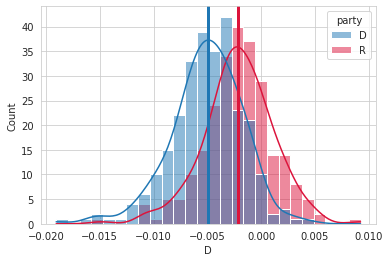

In [ ]:
sb.set_style("whitegrid")
sb.histplot(data=moc_df, x="D", hue="party", kde=True,
            palette=['tab:blue','crimson'], alpha=0.5)
plt.axvline(moc_df[moc_df.party == "R"].D.median(), color="crimson", lw=3)
plt.axvline(moc_df[moc_df.party == "D"].D.median(), color="tab:blue", lw=3)
plt.xlabel("D")
plt.show()

Finally, let's formally test whether there were significant differences in this measure across Republicans and Democrats. Since our variable is well behaved and appears to be approximately normally distributed, I'll be using an [independent samples t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_(unpaired)_samples).

**Technical, feel free to skip**. If your data seems to meet its assumptions, it's better to do a t-test because it's more efficient. By that we mean that if there is a real difference we're more likely to catch it. If your data don't meet the assumptions, however, it's better to stick to a test that makes less assumptions (such as the `ranksums` test we used earlier). Detailing the assumptions and how we know if our data fit them is beyond the scope of this module (but can be found at the page linked above).

In [ ]:
scipy.stats.ttest_ind(moc_df[moc_df.party == "D"].D,
                      moc_df[moc_df.party == "R"].D)

Ttest_indResult(statistic=-10.151802604591332, pvalue=3.262995101718459e-22)

### Inductive: Differential Language Analysis

[DLA](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791) is a method to inductively assess systematic differences in unigram frequencies. Above, we created list of words we thought might be correlated with party membership. This method, instead, allows us to explore differences in language along party lines, without having any pre-conceived ideas of such language differences. In other words, this method is completely data-driven and allows us to discover differences we might not have anticipated.

Imagine if we were to analyze linguistic differences between MoCs' campaign accounts and their office accounts. If we already had some ideas about what these differences might be (e.g. campaign accounts might use more formal language, office accounts might use more words related to congress), we could measure them like we did in the above section and deploy the appropriate statistical test. On the other hand, we might be interested in *whether* this language differs at all, and if so how. For addressing that question we might prefer an exploratory analysis like DLA.

Intuitively, DLA performs a seperate statistical test for every word in a pre-specified vocabulary (or whatever set of language feature you're interested in) to assess whether its use is associated with text meta-data after [correcting for multiple testing](https://en.wikipedia.org/wiki/Multiple_comparisons_problem#Multiple_testing_correction). Typically, this vocabulary is the top-$N$ most frequent words in the corpus.

Now, the folks who developed DLA actually have their own "end to end human text analysis package" called [DLATK](https://dlatk.wwbp.org/), and if you're interested in learning more about DLA I'd recommend you start there. We're going to instead code our own version of DLA from scratch to get a better understanding of how it works.

The first step of DLA is to identify what is the axis of variation you're interested in (e.g., if a tweet originated from a campaign account or an office account). You'll ultimately be trying to identify language features that are predictive of this difference. Here we're going to look at the political party affiliation of the MoC.

Next we need to decide on our set of linguistic features. When analyzing unigram frequencies using DLA, this is typically a vocabulary of the $N$ most frequent words in our corpus (excluding stop words), where $N$ is a parameter you can vary. The higher the value of $N$, the more words you test. The value of $N$ also effects the burden-of-proof for any particular association: the higher the value of $N$, the higher the bar is for finding a significant association. For this module I decided on $N=1000$.

So, to establish our vocabulary, we first have to iterate over the entire corpus and count how many times each word appears.

In [ ]:
# Creates a dictionary of word counts
word_counts = Counter(moc_df.text.sum())

Then, I make a list of the $N$ most frequent words

In [ ]:
topn = 1000
pop_words = [i[0] for i in sorted(word_counts.items(), 
                                  key=lambda x: x[1], reverse=True)[:topn]]

So now we have our vocabulary! Next, I'm going to define a function (a peice of code we can call later on) that will perform a `ranksums` test to compare whether a specific word is being used more or less often by one of two groups in our data.

In [ ]:
def wf_test(d, w, y, y_values, text="text"):
  '''
  d = a Pandas dataframe
  w = the word to be analyzed (i.e., a string)
  y = the characteristic the two groups differ on (name of the column in d)
  y_values = the two values of the y characteristic to test against (e.g., ['D', 'R'])
  Returns: the results of a scipy ranksums test of whether the two groups used
           w at the same rate
  '''
  # For each row in the data, at what rate was the word w used?
  X = d.text.apply(lambda x: x.count(w)/len(x))

  # Create a convenient dataframe with this information as well as each rows'
  # value of Y
  r = pd.DataFrame({'X': X, "Y": d[y]})

  # Compare the two groups' values of X using a ranksums test
  return scipy.stats.ranksums(r[r.Y==y_values[0]].X,
                              r[r.Y==y_values[1]].X)

You might find this function hard to follow. Let's take a look at an example of how to use it:

In [ ]:
wf_test(moc_df, 'black', 'party', ['D','R'])

RanksumsResult(statistic=15.67882058958397, pvalue=2.111382746121176e-55)

So this tells us that Democrats use the word "black at a higher rate than do Republicans (because the value is positive and Democrats are listed first). The first thing we pass to the function is the data we want to use for the test, the second thing is the word we're testing for differences in, the third thing is the characteristic that the data differ on, and the fourth and final thing is a list of the two values of that variable you want to test for differences between (for instance, we could have plugged in `['I', 'D']` there to see if independents and democrats use "black" at significantly different rates).

Now that we did an example with a single word, let's get to the proper DLA. We essentially do that same command for each of our 1000 most frequent words, and for each store information about the results and the word.

In [ ]:
# Create receptacles for the results of the DLA
p_values = []
test_stats = []

# For each of our 1k most frequent words...
for w in pop_words:

  # Calculate whether Democrats and Republicans use the word at different rates
  t, p = wf_test(moc_df, w, 'party', ['D','R'])

  # And add that information to our receptacles
  p_values.append(p)
  test_stats.append(t)

# Put all that information into a convenient dataframe
dla_results = pd.DataFrame({'test_stat': test_stats,
                            'p_values': p_values,
                            'w': pop_words})

Now, importantly, we need to correct our $P$-values for multiple comparisons. Basically, $P$-values aren't meant to be used for exploratory data analysis. However, they do carry valuable information about how confident we should be about the association between variables. Allowing for multiple comparisons (in the case of DLA) is essentially saying that since we're doing all of these different tests, the $P$-values might lead us astray, and we need to set our burden of proof higher as a result. In other words, we should only believe there's a reall association if we're *really* confident. There are many ways to do this, and we'll just what is conceptually the most simple (a Bonferroni correction), where we simply multiply each $P$-value by the number of tests we performed (in our case, 1000). Alternatively, you could say you only want to consider an association significant if it's less than $\frac{\alpha}{N tests}$, where $\alpha$ is your significance threshold (e.g., 0.05).

In the cell below, I correct for multiple comparisons and then make our dataset only contain those associations that are still statistically significant.

In [ ]:
# Bonferroni correction to the p-values
dla_results['p_values'] = dla_results.p_values * topn

# Only consider those associations that are still significant
dla_results = dla_results[dla_results.p_values <= 0.05]

Now, we'll take a look at the twenty-five words most indicative of being a Republican...

In [ ]:
dla_results.sort_values("test_stat").head(25)

test_stat      p_values             w
32  -16.736198  7.140546e-60        border
172 -15.082157  2.122195e-48      policies
320 -14.662692  1.117526e-45      spending
68  -14.523839  8.558032e-45     democrats
294 -14.341122  1.210827e-43      southern
390 -14.187744  1.091133e-42      trillion
623 -14.175543  1.298347e-42      taxpayer
477 -13.661669  1.719955e-39        pelosi
957 -13.460942  2.655106e-38  conservative
258 -13.438284  3.607063e-38         china
4   -13.204150  8.303171e-37         biden
441 -12.717291  4.740079e-34      partisan
329 -12.469214  1.099043e-32       illegal
659 -12.348371  4.970765e-32           god
481 -12.288821  1.040119e-31       radical
999 -12.254834  1.582733e-31       liberal
407 -12.182502  3.852769e-31        agenda
850 -11.656428  2.127835e-28           1.9
818 -11.628541  2.950985e-28      democrat
770 -11.476615  1.729176e-27     communist
379 -11.210238  3.632170e-26       dollars
758 -11.047855  2.245162e-25      pipeline
298 -10.966518  5.536368e-25   enforcement
495 -10.660634  1.555342e-23       instead
275 -10.610379  2.666649e-23           men

Now, we'll take a look at the twenty-five words most indicative of being a Democrat...

In [ ]:
dla_results.sort_values("test_stat", ascending=False).head(25)

test_stat      p_values                    w
121  17.223347  1.774233e-63  #americanrescueplan
494  17.076360  2.225773e-62                lgbtq
94   16.686525  1.642579e-59            democracy
101  16.480859  5.036412e-58                 pass
512  16.116587  1.950917e-55         insurrection
699  16.076790  3.711187e-55                floyd
111  15.790078  3.641314e-53              justice
170  15.678821  2.111383e-52                black
340  15.570468  1.155579e-51                equal
209  15.295376  8.208549e-50               rescue
462  15.267780  1.253699e-49       discrimination
674  14.507571  1.084943e-44               racism
650  14.431754  3.266672e-44        #forthepeople
84   14.116864  2.990019e-42             violence
613  14.045404  8.219789e-42               racial
321  13.933276  3.976885e-41             equality
501  13.842353  1.414979e-40                 bold
267  13.322379  1.715531e-37                 hate
594  13.248595  4.597313e-37                color
602  13.194564  9.429907e-37              poverty
736  13.191659  9.800451e-37                asian
351  13.159996  1.490943e-36           affordable
467  13.122523  2.446530e-36               invest
503  13.061230  5.483483e-36             payments
919  13.054839  5.963603e-36               equity

Finally, let's take a look at the 10 most popular words (with significant assocaitions) and how they predict partisanship...

In [ ]:
dla_results.head(10)

test_stat      p_values          w
1   11.446405  2.451019e-27         we
2    7.140495  9.299527e-10      today
3    5.124506  2.983192e-04     people
4  -13.204150  8.303171e-37      biden
6    9.041451  1.546054e-16       must
7    6.244629  4.248072e-07       work
8    9.849880  6.862554e-20        act
9    8.256261  1.503066e-13       need
10  -5.044912  4.537303e-04  president
11  11.354901  7.011940e-27       help

# Your Turn!

## Problem 1: (Anti-)Assortativity in Twitter mentions by chamber?



1.   Re-create the network visualization in the guided section, but color nodes such that MoCs in the Senate are blue and MoCs in the House of Representatives are orange ("tab:blue" and "tab:orange" are two colors that look particularly nice, but feel free to explore [others](https://matplotlib.org/stable/gallery/color/named_colors.html)). 
2. From eyeing the network diagram you just created, does it look like their might be (anti-)assortativity by chamber?
3.   Perform Louvain clustering on this network with a "resolution" parameter value of 0.5. Then plot the proportion of members of each community detected that belong to the Senate. Also, plot a horizontal line on this same graph that shows the overall proportion of MoCs in the data that belong to the Senate. 
4. Does it appear from the graph you just produced that the Louvain clustering algorithm picked up on communities that were divided by chamber?
5.  Formally test whether there is significantly more/less assortativity by chamber that one would expect by chance using the configuration model. Specifically, (a) measure the assortativity coefficient in your network on the basis of chamber, (b) simulate five-hundred "null" networks with the same in- and out-degree distributions, and (c) calculate the proportion of those null networks that had more/less assoratitivty than your observed network.
6.  Do you observe statistically significan (anti-)assortativity on the basis of the chamber MoCs belong to?





## Problem 2: Is Twitter language different by chamber?

1. Perform a differential language analysis with respect to MoC's chamber using the `moc_df`. Specifically, test whether each of the one-thousand most popular words significantly differs in how often it is used by MoCs in the two chambers, and create a dataset of words that are significantly associated with chamber after correcting the $P$-values for multiple comparisons.
2. What do your results suggest? Are there detectable differences between members of the senate and members of the house?
3. If there are differences, report the 15 words most associated (of those that were significantly different) with being a member of the Snate and the House of Representatives. If there aren't, you can skip this question.

## Problem 3: Is inflamatory language used more by Democrats or by Republicans?

1.  Test whether Democrats or Republicans use words from the following list more often: terrible, evil, enemy, destroy, stupid (or some alteration of stupid such as stupidity), dumb (or some alteration of dumb), and unamerican.
2. What do your results suggest; is there a significant difference? If so, which party did you find used more inflamatory language (as defined by the list provided?
2.  Create your own list of words that refer to a single topic/idea you are interested in (at least 7 words; ideally it is 12 or more). Test whether Democrats and Republicans use these words at different rates. Do you find significant differences? If so, which party used the words you selected more?

In [ ]:
# Starter code for problem 1; part 1
inflame = ['terrible','evil','enemy','destroy','stupid*','dumb*','unamerican']
inflame_dict = dictify({'inflamatory':inflame})

# Congratulations on finishing the methods module!

Now, all that's left is **turning in** your work. 

To do that, complete the following steps:
1. Click on File > Download > Download .ipynb. You'll then download a file you probably can't open on your computer. 
2. Click on File > Print, and then save a .pdf file of work as well. 
3. Review the .pdf to make sure it shows that you answered all the questions and completed each part of the problems (even if all your work isn't shown--sometimes the output of code blocks are cut off in the .pdf files). 
4. Then, submit both files on Canvas together.

To re-iterate, **YOU SHOULD BE TURNING IN TWO FILES--(1) A .pdf AND (2) A .ipynb**